In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import re
import numpy as np
from matplotlib.lines import Line2D
import  matplotlib.ticker as mtick
from scipy import stats

In [2]:
def read_csv(path: str):
    """
    Funcao responsavel por realizar a leitura de um dataset em formato csv

    Parameters:
    path: Arquivo csv contendo os dados

    Returns: 
    df: DataFrame contendo os dados já lidos 
    """
    df = pd.read_csv(path, low_memory=True, dtype=str)
    if "votos_cantidad" in df.columns:
        df["votos_cantidad"] = df["votos_cantidad"].astype("int32")

    return df

In [3]:
# Dicionário de normalizações 
normalizacoes_2025 = {
    "FUERZA PATRIA": "FUERZA PATRIA",
    "LA LIBERTAD AVANZA": "LA LIBERTAD AVANZA",
    "FRENTE DE IZQUIERDA Y TRABAJADORES": "FRENTE DE IZQUIERDA Y TRABAJADORES",
    "PROVINCIAS UNIDAS": "PROVINCIAS UNIDAS"    
}



normalizacoes_2023={"UNION POR LA PATRIA": "UNION POR LA PATRIA",
    "FRENTE CIVICO POR SANTIAGO": "UNION POR LA PATRIA",
    "MAS PARA ENTRE RIOS": "UNION POR LA PATRIA",
    "FRENTE RENOVADOR DE LA CONCORDIA – INNOVACION FEDERAL": "UNION POR LA PATRIA",
    "UNION POR SAN LUIS": "UNION POR LA PATRIA",
    "FRENTE RENOVADOR": "UNION POR LA PATRIA",

    "LA LIBERTAD AVANZA": "LA LIBERTAD AVANZA",
    "AHORA PATRIA": "LA LIBERTAD AVANZA",
    "FUERZA REPUBLICANA": "LA LIBERTAD AVANZA",
    "PARTIDO RENOVADOR FEDERAL": "LA LIBERTAD AVANZA",
    "ARRIBA NEUQUEN": "LA LIBERTAD AVANZA",
    "PARTIDO FE": "LA LIBERTAD AVANZA",
    "REPUBLICANOS UNIDOS": "LA LIBERTAD AVANZA",

    "JUNTOS POR EL CAMBIO": "JUNTOS POR EL CAMBIO",
    "FRENTE CAMBIA MENDOZA": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR ENTRE RIOS": "JUNTOS POR EL CAMBIO",
    "ECO + VAMOS CORRIENTES": "JUNTOS POR EL CAMBIO",
    "FRENTE CAMBIA JUJUY": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO CHUBUT": "JUNTOS POR EL CAMBIO",
    "CAMBIA SANTA CRUZ": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO TIERRA DEL FUEGO": "JUNTOS POR EL CAMBIO",

    "HACEMOS POR NUESTRO PAIS": "HACEMOS POR NUESTRO PAIS",
    "LA FUERZA DE SANTA FE": "HACEMOS POR NUESTRO PAIS",
    "PARTIDO AUTONOMISTA": "HACEMOS POR NUESTRO PAIS",
    "PARTIDO DEMOCRATA CRISTIANO": "HACEMOS POR NUESTRO PAIS",
    "PARTIDO UNION Y LIBERTAD": "HACEMOS POR NUESTRO PAIS",}

normalizacoes_2021={"JUNTOS POR EL CAMBIO": "JUNTOS POR EL CAMBIO",
    "JUNTOS": "JUNTOS POR EL CAMBIO",
    "FRENTE CAMBIA MENDOZA": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR ENTRE RIOS": "JUNTOS POR EL CAMBIO",
    "ECO + VAMOS CORRIENTES": "JUNTOS POR EL CAMBIO",
    "CHACO CAMBIA + JUNTOS POR EL CAMBIO": "JUNTOS POR EL CAMBIO",
    "FRENTE CAMBIA JUJUY": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO +": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR FORMOSA LIBRE": "JUNTOS POR EL CAMBIO",
    "UNIDOS POR SAN LUIS": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO CHUBUT": "JUNTOS POR EL CAMBIO",
    "CAMBIA NEUQUEN": "JUNTOS POR EL CAMBIO",
    "CAMBIA SANTA CRUZ": "JUNTOS POR EL CAMBIO",
    "COALICION CIVICA - (ARI)": "JUNTOS POR EL CAMBIO",
    "VAMOS LA RIOJA": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO TIERRA DEL FUEGO": "JUNTOS POR EL CAMBIO",
    "UNION CIVICA RADICAL": "JUNTOS POR EL CAMBIO",
    "UNIDOS": "JUNTOS POR EL CAMBIO",

    "FRENTE DE TODOS": "FRENTE DE TODOS",
    "FRENTE CIVICO POR SANTIAGO": "FRENTE DE TODOS",
    "FUERZA SAN LUIS": "FRENTE DE TODOS",
    "FRENTE RENOVADOR": "FRENTE DE TODOS",
    "COMPROMISO FEDERAL": "FRENTE DE TODOS",
    "TODOS UNIDOS": "FRENTE DE TODOS",

    "HACEMOS POR CORDOBA": "TERCERA VIA",
    "VAMOS CON VOS": "TERCERA VIA",
    "FRENTE AMPLIO PROGRESISTA": "TERCERA VIA",
    "MOVIMIENTO LIBRES DEL SUR": "TERCERA VIA",
    "PARTIDO SOCIALISTA": "TERCERA VIA",
    "FRENTE AMPLIO POR TUCUMAN": "TERCERA VIA",
    "CONSENSO ISCHIGUALASTO": "TERCERA VIA ",
    "PARTIDO FE": "TERCERA VIA",
    "FRENTE AMPLIO CATAMARQUENO": "TERCERA VIA",

    "AVANZA LIBERTAD": "LA LIBERTAD AVANZA",
    "LA LIBERTAD AVANZA": "LA LIBERTAD AVANZA",
    "FUERZA REPUBLICANA": "LA LIBERTAD AVANZA",
    "VAMOS MENDOCINOS": "LA LIBERTAD AVANZA",
    "PODEMOS": "LA LIBERTAD AVANZA",
    "PARTIDO CONSERVADOR POPULAR": "LA LIBERTAD AVANZA",
    "PARTIDO LIBERTAD, VALORES Y CAMBIO": "LA LIBERTAD AVANZA",
    "UNION DEL CENTRO DEMOCRATICO": "LA LIBERTAD AVANZA",
    "UNION POPULAR FEDERAL": "LA LIBERTAD AVANZA",
    "REPUBLICANOS UNIDOS": "LA LIBERTAD AVANZA",
    "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "FRENTE DE IZQUIERDA Y DE TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO DEL OBRERO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "NUEVA IZQUIERDA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",}

normalizacoes_2019={ "FRENTE DE TODOS": "FRENTE DE TODOS",
    "FRENTE CIVICO POR SANTIAGO": "FRENTE DE TODOS",
    "VAMOS TODOS A VIVIR MEJOR": "FRENTE DE TODOS",

    "JUNTOS POR EL CAMBIO": "JUNTOS POR EL CAMBIO",
    "CAMBIA MENDOZA": "JUNTOS POR EL CAMBIO",
    "ENCUENTRO POR CORRIENTES": "JUNTOS POR EL CAMBIO",
    "FRENTE AMPLIO FORMOSEÑO": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR LA RIOJA": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO TIERRA DEL FUEGO": "JUNTOS POR EL CAMBIO",

    "CONSENSO FEDERAL": "CONSENSO FEDERAL",
    "ALIANZA HACEMOS POR CORDOBA": "CONSENSO FEDERAL",
    "PARTIDO SOCIALISTA": "CONSENSO FEDERAL",
    "UNION POR SALTA": "CONSENSO FEDERAL",
    "PROTECTORA FUERZA POLITICA": "CONSENSO FEDERAL",
    "GENERACION PARA UN ENCUENTRO NACIONAL": "CONSENSO FEDERAL",
    "MOVIMIENTO POLO SOCIAL": "CONSENSO FEDERAL",
    "MOVIMIENTO LIBRES DEL SUR": "CONSENSO FEDERAL",
    "FRENTE RENOVADOR AUTENTICO": "CONSENSO FEDERAL",
    "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "FRENTE DE IZQUIERDA Y DE TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES – NUEVA IZQUIERDA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "ALIANZA FRENTE RENOVADOR DE LA CONCORDIA": "FRENTE NOS",
    "FUERZA REPUBLICANA": "FRENTE NOS",
    "ENCUENTRO VECINAL CORDOBA": "FRENTE NOS",
    "PARTIDO CONSERVADOR POPULAR": "FRENTE NOS",
    "ACCION CHAQUENA": "FRENTE NOS",
    "PARTIDO CIUDADANOS A GOBERNAR": "FRENTE NOS",}

normalizacoes_2017={"CAMBIEMOS BUENOS AIRES": "CAMBIEMOS",
    "CAMBIEMOS": "CAMBIEMOS",
    "VAMOS JUNTOS": "CAMBIEMOS",
    "CAMBIEMOS PARA EL BICENTENARIO": "CAMBIEMOS",
    "ENCUENTRO POR CORRIENTES": "CAMBIEMOS",
    "CAMBIEMOS - PARTIDO IDENTIDAD SALTENA": "CAMBIEMOS",
    "FRENTE JUJENO CAMBIEMOS": "CAMBIEMOS",
    "CAMBIEMOS SAN JUAN": "CAMBIEMOS",
    "AVANZAR Y CAMBIEMOS POR SAN LUIS": "CAMBIEMOS",
    "CAMBIEMOS RIO NEGRO": "CAMBIEMOS",
    "FRENTE AMPLIO FORMOSENO - CAMBIEMOS": "CAMBIEMOS",
    "FRENTE CAMBIEMOS LA PAMPA": "CAMBIEMOS",
    "CAMBIEMOS CHUBUT": "CAMBIEMOS",
    "CAMBIEMOS - FUERZA CIVICA RIOJANA": "CAMBIEMOS",
    "FRENTE CIVICO Y SOCIAL - CAMBIEMOS": "CAMBIEMOS",
    "UNION PARA VIVIR MEJOR - CAMBIEMOS": "CAMBIEMOS",
    "CAMBIEMOS TIERRA DEL FUEGO": "CAMBIEMOS",

    "UNIDAD CIUDADANA": "UNIDAD CIUDADANA",
    "FRENTE PARA LA VICTORIA": "UNIDAD CIUDADANA",
    "UNIDAD PORTENA": "UNIDAD CIUDADANA",
    "FRENTE CIVICO POR SANTIAGO": "UNIDAD CIUDADANA",
    "CORDOBA CIUDADANA": "UNIDAD CIUDADANA",
    "FRENTE CIUDADANO PARA LA VICTORIA": "UNIDAD CIUDADANA",
    "FRENTE UNIDAD JUSTICIALISTA SAN LUIS": "UNIDAD CIUDADANA",
    "PARTIDO AGRARIO Y SOCIAL": "UNIDAD CIUDADANA",
    "UNIDAD CIUDADANA PARA LA VICTORIA": "UNIDAD CIUDADANA",
    "FRENTE NEUQUINO": "UNIDAD CIUDADANA",
    "FRENTE CIUDADANO Y SOCIAL": "UNIDAD CIUDADANA",
    "FRENTE POPULAR PARA LA LIBERACION": "UNIDAD CIUDADANA",
    "ALTERNATIVA POPULAR RIOJANA": "UNIDAD CIUDADANA",
    "FRENTE CIVICO PARA LA VICTORIA": "UNIDAD CIUDADANA",
    
    "UNION POR CORDOBA": "FRENTE JUSTICIALISTA"
    }

normalizacoes_2015={ "CAMBIEMOS": "CAMBIEMOS",
    "CAMBIEMOS BUENOS AIRES": "CAMBIEMOS",
    "CAMBIEMOS MENDOZA": "CAMBIEMOS",
    "CAMBIA JUJUY": "CAMBIEMOS",
    "ENCUENTRO POR CORRIENTES": "CAMBIEMOS",
    "CAMBIEMOS SALTA": "CAMBIEMOS",
    "CAMBIEMOS RIO NEGRO": "CAMBIEMOS",
    "FRENTE AMPLIO FORMOSENO": "CAMBIEMOS",
    "FRENTE CIVICO Y SOCIAL": "CAMBIEMOS",
    "FRENTE PAMPEANO CIVICO Y SOCIAL": "CAMBIEMOS",
    "CAMBIEMOS CHUBUT": "CAMBIEMOS",
    "CAMBIEMOS TIERRA DEL FUEGO": "CAMBIEMOS",

    "UNIDOS POR UNA NUEVA ALTERNATIVA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "UNION POR CORDOBA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "FRENTE RENOVADOR FEDERAL DE LA ESPERANZA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "COMPROMISO POR SAN JUAN": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "MOVIMIENTO DE PARTICIPACION CIUDADANA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "UNION POPULAR": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "FRENTE UNIDOS": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "PUEBLO NUEVO": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "FRENTE TERCERA POSICION": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "FRENTE RENOVADOR AUTENTICO": "UNIDOS POR UNA NUEVA ALTERNATIVA",

    "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "PROGRESISTAS": "PROGRESISTAS",
    "FRENTE PROGRESISTA CIVICO Y SOCIAL": "PROGRESISTAS",
    "PARTIDO SOCIALISTA": "PROGRESISTAS",
    "MOVIMIENTO POLO SOCIAL – LA TERCERA POSICION DE LA GENTE": "PROGRESISTAS",
    "PARTIDO GEN": "PROGRESISTAS",

    "ALIANZA FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "FRENTE CIVICO PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "ALIANZA UNIDOS POR UNA NUEVA ALTERNATIVA (UNA)": "UNIDOS POR UNA NUEVA ALTERNATIVA",

    "COMPROMISO FEDERAL": "COMPROMISO FEDERAL",
    "PARTIDO ES POSIBLE": "COMPROMISO FEDERAL",
    "ALIANZA CAMBIEMOS": "CAMBIEMOS",
    "ALIANZA CAMBIEMOS BUENOS AIRES": "CAMBIEMOS",
    "ALIANZA CAMBIEMOS MENDOZA": "CAMBIEMOS",
    "ALIANZA CAMBIA JUJUY": "CAMBIEMOS",
    "ALIANZA ENCUENTRO POR CORRIENTES": "CAMBIEMOS",
    "ALIANZA CAMBIEMOS SALTA": "CAMBIEMOS",
    "ALIANZA CAMBIEMOS RIO NEGRO": "CAMBIEMOS",
    "ALIANZA FRENTE AMPLIO FORMOSENO": "CAMBIEMOS",
    "ALIANZA FRENTE CIVICO Y SOCIAL": "CAMBIEMOS",
    "ALIANZA FRENTE PAMPEANO CIVICO Y SOCIAL": "CAMBIEMOS",
    "ALIANZA CAMBIEMOS CHUBUT": "CAMBIEMOS",
    "ALIANZA CAMBIEMOS TIERRA DEL FUEGO": "CAMBIEMOS",
    "ALIANZA FRENTE CAMBIEMOS": "CAMBIEMOS",

    "ALIANZA UNIDOS POR UNA NUEVA ALTERNATIVA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA UNION POR CORDOBA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA FRENTE RENOVADOR FEDERAL DE LA ESPERANZA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA COMPROMISO POR SAN JUAN": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA MOVIMIENTO DE PARTICIPACION CIUDADANA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA UNION POPULAR": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA FRENTE UNIDOS": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA PUEBLO NUEVO": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA FRENTE TERCERA POSICION": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA FRENTE RENOVADOR AUTENTICO": "UNIDOS POR UNA NUEVA ALTERNATIVA",

    "ALIANZA FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "ALIANZA PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "ALIANZA FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "ALIANZA PROGRESISTAS": "PROGRESISTAS",
    "ALIANZA FRENTE PROGRESISTA CIVICO Y SOCIAL": "PROGRESISTAS",
    "ALIANZA PARTIDO SOCIALISTA": "PROGRESISTAS",
    "ALIANZA MOVIMIENTO POLO SOCIAL – LA TERCERA POSICION DE LA GENTE": "PROGRESISTAS",
    "ALIANZA PARTIDO GEN": "PROGRESISTAS",

    "ALIANZA COMPROMISO FEDERAL": "COMPROMISO FEDERAL",
    "ALIANZA PARTIDO ES POSIBLE": "COMPROMISO FEDERAL"
    }

normalizacoes_2013={"FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "FRENTE CIVICO POR SANTIAGO": "FRENTE PARA LA VICTORIA",
    "PARTIDO JUSTICIALISTA DE LA PROVINCIA DE SALTA": "FRENTE PARA LA VICTORIA",
    "PARTIDO DE LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "MOVIMIENTO SOLIDARIO POPULAR": "FRENTE PARA LA VICTORIA",
    "ENCUENTRO DEMOCRATICO PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",

    "FRENTE PROGRESISTA CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "UNION CIVICA RADICAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE AMPLIO UNEN": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "ACUERDO CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "ENCUENTRO POR CORRIENTES": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "UNION POR CHACO": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE JUJENO": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE AMPLIO FORMOSENO": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FUERZA CIVICA RIOJANA": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE PROGRESISTA": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE PAMPEANO CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "COALICION CIVICA - (ARI)": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "UNION PARA VIVIR MEJOR": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "COMPROMISO CIVICO NEUQUINO": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "PARTIDO SOCIALISTA": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE PROGRESISTA CIVICO Y SOCIAL – COALICION CIVICA - (ARI)": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE PROGRESISTA SUR": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "GENERACION PARA UN ENCUENTRO NACIONAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",

    "FRENTE RENOVADOR": "FRENTE RENOVADOR",
    "CAMBIO POPULAR": "FRENTE RENOVADOR",
    "FRENTE TERCERA POSICION – UNIDAD CATAMARQUENA": "FRENTE RENOVADOR",
    "SANTAFESINO CIEN POR CIENTO": "FRENTE RENOVADOR",
    "PARTIDO LABORISTA DE LA INDEPENDENCIA": "FRENTE RENOVADOR",

    "UNION PRO": "PROPUESTA REPUBLICANA",
    "UNION PRO SANTA FE FEDERAL": "PROPUESTA REPUBLICANA",
    "UNION POR ENTRE RIOS": "PROPUESTA REPUBLICANA",
    "FRENTE POPULAR SALTENIO": "PROPUESTA REPUBLICANA",
    "FRENTE UNIDOS": "PROPUESTA REPUBLICANA",
    "PARTIDO DEMOCRATA – PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "PROPUESTA FEDERAL": "PROPUESTA REPUBLICANA",
    "PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "NUEVO PACTO FEDERAL": "PROPUESTA REPUBLICANA",

    "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "FRENTE DE IZQUIERDA Y TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE  TRABAJADORES",
    "IZQUIERDA POR UNA OPCION SOCIALISTA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO DE LOS TRABAJADORES SOCIALISTAS": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "UNIDOS POR LA LIBERTAD Y EL TRABAJO": "PARTIDO FE",
    "FRENTE RENOVADOR DE LA CONCORDIA": "PARTIDO FE",
    "COMPROMISO FEDERAL": "PARTIDO FE",
    "PARTIDO ACCION CHUBUTENSE": "PARTIDO FE",
    "UNION CON FE": "PARTIDO FE",
    "PARTIDO FE": "PARTIDO FE",
    "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "MOVIMIENTO POPULAR NEUQUINO": "NUEVA IZQUIERDA",
    "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES – NUEVA IZQUIERDA": "NUEVA IZQUIERDA",
    "ALTERNATIVA POPULAR": "NUEVA IZQUIERDA",
    "FRENTE DEL PUEBLO": "NUEVA IZQUIERDA",}

normalizacoes_2011={ "FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "FRENTE CIVICO POR SANTIAGO": "FRENTE PARA LA VICTORIA",
    "FRENTE RENOVADOR DE LA CONCORDIA": "FRENTE PARA LA VICTORIA",
    "PARTIDO HUMANISTA": "FRENTE PARA LA VICTORIA",
    "FRENTE PARA LA VICTORIA RIOJANA": "FRENTE PARA LA VICTORIA",
    "FRENTE POPULAR RIOJANO": "FRENTE PARA LA VICTORIA",
    "PARTIDO JUSTICIALISTA": "FRENTE PARA LA VICTORIA",

    "FRENTE AMPLIO PROGRESISTA": "FRENTE AMPLIO PROGRESISTA",
    "PARTIDO SOCIALISTA": "FRENTE AMPLIO PROGRESISTA",
    "GENERACION PARA UN ENCUENTRO NACIONAL": "FRENTE AMPLIO PROGRESISTA",
    "MOVIMIENTO LIBRES DEL SUR": "FRENTE AMPLIO PROGRESISTA",

    "UNION PARA EL DESARROLLO SOCIAL": "UNION PARA EL DESARROLLO SOCIAL",
    "UNION CIVICA RADICAL": "UNION PARA EL DESARROLLO SOCIAL",
    "FRENTE CIVICO FEDERAL – UNION PARA EL DESARROLLO SOCIAL MENDOZA": "UNION PARA EL DESARROLLO SOCIAL",
    "FRENTE PAMPEANO CIVICO Y SOCIAL": "UNION PARA EL DESARROLLO SOCIAL",
    "FRENTE CIVICO Y SOCIAL": "UNION PARA EL DESARROLLO SOCIAL",

    "FRENTE POPULAR": "PROPUESTA REPUBLICANA",
    "PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "PRO - PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "PRO-PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "UNION POPULAR": "PROPUESTA REPUBLICANA",
    "FRENTE SALTENIO": "PROPUESTA REPUBLICANA",
    "PARTIDO INDEPENDIENTE DEL CHUBUT": "PROPUESTA REPUBLICANA",
    "FRENTE POPULAR UNION PRO": "PROPUESTA REPUBLICANA",
    "FRENTE PRIMERO JUJUY": "PROPUESTA REPUBLICANA",
    "CAMBIO POPULAR TUCUMANO": "PROPUESTA REPUBLICANA",
    "MOVIMIENTO INDEPENDIENTE RENOVADOR": "PROPUESTA REPUBLICANA",
    "PARTIDO FORTALEZA": "PROPUESTA REPUBLICANA",
    "ACUERDO REPUBLICANO FEDERAL": "PROPUESTA REPUBLICANA",

    "COMPROMISO FEDERAL": "COMPROMISO FEDERAL",
    "UNION PROVINCIAL": "COMPROMISO FEDERAL",
    "PARTIDO ES POSIBLE": "COMPROMISO FEDERAL",

    "COALICION CIVICA - COALICION CIVICA - (ARI) ARI": "COALICION CIVICA - (ARI)",
    "MOVIMIENTO DE PARTICIPACION CIUDADANA": "COALICION CIVICA - (ARI)",
    "UNION POR LA LIBERTAD": "COALICION CIVICA - (ARI)",
    "COALICION CIVICA (ARI)": "COALICION CIVICA - (ARI)",

    "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "FRENTE DE IZQUIERDA Y TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "IZQUIERDA DEL TRABAJADOR POR EL SOCIALISMO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "IZQUIERDA POR UNA OPCION SOCIALISTA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "MOVIMIENTO POPULAR NEUQUINO": "MOVIMIENTO PROYECTO SUR",
    "MOVIMIENTO INDEPENDIENTE DE JUBILADOS Y DESOCUPADOS": "MOVIMIENTO PROYECTO SUR",
    "PARTIDO POPULAR DE LA RECONSTRUCCION": "MOVIMIENTO PROYECTO SUR",
    "PROYECTO SUR": "MOVIMIENTO PROYECTO SUR",
    "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES – NUEVA IZQUIERDA": "MOVIMIENTO PROYECTO SUR",
    "FRENTE ENCUENTRO SUR": "MOVIMIENTO PROYECTO SUR",

    "ALIANZA FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "ALIANZA FRENTE CIVICO POR SANTIAGO": "FRENTE PARA LA VICTORIA",
    "ALIANZA FRENTE RENOVADOR DE LA CONCORDIA": "FRENTE PARA LA VICTORIA",
    "ALIANZA PARTIDO HUMANISTA": "FRENTE PARA LA VICTORIA",
    "ALIANZA FRENTE PARA LA VICTORIA RIOJANA": "FRENTE PARA LA VICTORIA",
    "ALIANZA FRENTE POPULAR RIOJANO": "FRENTE PARA LA VICTORIA",
    "ALIANZA PARTIDO JUSTICIALISTA": "FRENTE PARA LA VICTORIA",

    "ALIANZA FRENTE AMPLIO PROGRESISTA": "FRENTE AMPLIO PROGRESISTA",
    "ALIANZA PARTIDO SOCIALISTA": "FRENTE AMPLIO PROGRESISTA",
    "ALIANZA GENERACION PARA UN ENCUENTRO NACIONAL": "FRENTE AMPLIO PROGRESISTA",
    "ALIANZA MOVIMIENTO LIBRES DEL SUR": "FRENTE AMPLIO PROGRESISTA",

    "ALIANZA UNION PARA EL DESARROLLO SOCIAL": "UNION PARA EL DESARROLLO SOCIAL",
    "ALIANZA UNION CIVICA RADICAL": "UNION PARA EL DESARROLLO SOCIAL",
    "ALIANZA FRENTE CIVICO FEDERAL – UNION PARA EL DESARROLLO SOCIAL MENDOZA": "UNION PARA EL DESARROLLO SOCIAL",
    "ALIANZA FRENTE PAMPEANO CIVICO Y SOCIAL": "UNION PARA EL DESARROLLO SOCIAL",
    "ALIANZA FRENTE CIVICO Y SOCIAL": "UNION PARA EL DESARROLLO SOCIAL",

    "ALIANZA FRENTE POPULAR": "PROPUESTA REPUBLICANA",
    "ALIANZA PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "ALIANZA PRO-PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "ALIANZA PRO - PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "ALIANZA UNION POPULAR": "PROPUESTA REPUBLICANA",
    "ALIANZA FRENTE SALTENIO": "PROPUESTA REPUBLICANA",
    "ALIANZA PARTIDO INDEPENDIENTE DEL CHUBUT": "PROPUESTA REPUBLICANA",
    "ALIANZA FRENTE POPULAR UNION PRO": "PROPUESTA REPUBLICANA",
    "ALIANZA FRENTE PRIMERO JUJUY": "PROPUESTA REPUBLICANA",
    "ALIANZA CAMBIO POPULAR TUCUMANO": "PROPUESTA REPUBLICANA",
    "ALIANZA MOVIMIENTO INDEPENDIENTE RENOVADOR": "PROPUESTA REPUBLICANA",
    "ALIANZA PARTIDO FORTALEZA": "PROPUESTA REPUBLICANA",
    "ALIANZA ACUERDO REPUBLICANO FEDERAL": "PROPUESTA REPUBLICANA",

    "ALIANZA COMPROMISO FEDERAL": "COMPROMISO FEDERAL",
    "ALIANZA UNION PROVINCIAL": "COMPROMISO FEDERAL",
    "ALIANZA PARTIDO ES POSIBLE": "COMPROMISO FEDERAL",

    "ALIANZA COALICION CIVICA - COALICION CIVICA - (ARI) ARI": "COALICION CIVICA - (ARI)",
    "ALIANZA MOVIMIENTO DE PARTICIPACION CIUDADANA": "COALICION CIVICA - (ARI)",
    "ALIANZA UNION POR LA LIBERTAD": "COALICION CIVICA - (ARI)",

    "ALIANZA FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "ALIANZA PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE  TRABAJADORES",
    "ALIANZA IZQUIERDA DEL TRABAJADOR POR EL SOCIALISMO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "ALIANZA IZQUIERDA POR UNA OPCION SOCIALISTA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "ALIANZA FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "ALIANZA MOVIMIENTO POPULAR NEUQUINO": "MOVIMIENTO PROYECTO SUR",
    "ALIANZA MOVIMIENTO INDEPENDIENTE DE JUBILADOS Y DESOCUPADOS": "MOVIMIENTO PROYECTO SUR",
    "ALIANZA PARTIDO POPULAR DE LA RECONSTRUCCION": "MOVimiento PROYECTO SUR",
    "ALIANZA PROYECTO SUR": "MOVIMIENTO PROYECTO SUR",
    "ALIANZA MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES – NUEVA IZQUIERDA": "MOVIMIENTO PROYECTO SUR",
    "ALIANZA FRENTE ENCUENTRO SUR": "MOVIMIENTO PROYECTO SUR"
    }
normalizacoes_2009 = {"ACUERDO CIVICO Y SOCIAL": "ACUERDO CIVICO Y SOCIAL",
"FRENTE PROGRESISTA CIVICO Y SOCIAL": "ACUERDO CIVICO Y SOCIAL",
"UNION CIVICA RADICAL": "ACUERDO CIVICO Y SOCIAL",
"FRENTE CIVICO DE CORDOBA": "ACUERDO CIVICO Y SOCIAL",
"FRENTE CIVICO FEDERAL – UNION CIVICA RADICAL – CONSENSO FEDERAL": "ACUERDO CIVICO Y SOCIAL",
"FRENTE DE TODOS": "ACUERDO CIVICO Y SOCIAL",
"PARTIDO SOCIALISTA": "ACUERDO CIVICO Y SOCIAL",
"FRENTE CIVICO Y SOCIAL DE CATAMARCA": "ACUERDO CIVICO Y SOCIAL",
"CONCERTACION PARA EL DESARROLLO": "ACUERDO CIVICO Y SOCIAL",
"COALICION CIVICA - (ARI)": "ACUERDO CIVICO Y SOCIAL",
"FRENTE PAMPEANO CIVICO Y SOCIAL": "ACUERDO CIVICO Y SOCIAL",
"CAMBIEMOS PARA CRECER": "ACUERDO CIVICO Y SOCIAL",
"FRENTE FEDERAL CIVICO Y SOCIAL": "ACUERDO CIVICO Y SOCIAL",
"PARTIDO SOCIALISTA – LA COALICION": "ACUERDO CIVICO Y SOCIAL",
"PROYECTO PROGRESISTA": "ACUERDO CIVICO Y SOCIAL",
"FRENTE CIVICO RIOJANO": "ACUERDO CIVICO Y SOCIAL",

"FRENTE JUSTICIALISTA PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
"FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
"PARTIDO JUSTICIALISTA": "FRENTE PARA LA VICTORIA",
"FRENTE CHACO MERECE MAS": "FRENTE PARA LA VICTORIA",
"FRENTE JUSTICIALISTA ENTRERRIANO": "FRENTE PARA LA VICTORIA",
"FRENTE CIVICO POR SANTIAGO": "FRENTE PARA LA VICTORIA",
"FRENTE PARA LA VICTORIA, LA EQUIDAD Y LA JUSTICIA SOCIAL": "FRENTE PARA LA VICTORIA",
"FRENTE PARA LA INTEGRACION": "FRENTE PARA LA VICTORIA",
"FRENTE CORRENTINOS POR EL CAMBIO": "FRENTE PARA LA VICTORIA",
"UNION POR JUJUY": "FRENTE PARA LA VICTORIA",
"FRENTE AMPLIO": "FRENTE PARA LA VICTORIA",

"UNION PRO": "PROPUESTA REPUBLICANA",
"PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
"FRENTE DEMOCRATA – UNION PRO": "PROPUESTA REPUBLICANA",
"SALTA SOMOS TODOS": "PROPUESTA REPUBLICANA",
"FRENTE UNION POR SAN JUAN": "PROPUESTA REPUBLICANA",
"FRENTE UNION POR SANTIAGO": "PROPUESTA REPUBLICANA",
"FRENTE PRO FEDERAL": "PROPUESTA REPUBLICANA",
"PROPUESTA PARA EL CAMBIO": "PROPUESTA REPUBLICANA",

"SANTA FE FEDERAL": "PERONISMO FEDERAL",
"UNION POR CORDOBA": "PERONISMO FEDERAL",
"FRENTE ES POSIBLE": "PERONISMO FEDERAL",
"FRENTE FEDERAL": "PERONISMO FEDERAL",
"FRENTE PRIMERO JUJUY": "PERONISMO FEDERAL",
"MOVIMIENTO DE ACCION POPULAR": "PERONISMO FEDERAL",
"PARTIDO LABORISTA DE TUCUMAN": "PERONISMO FEDERAL",
"FRENTE PARA EL CAMBIO": "PERONISMO FEDERAL",
"PARTIDO FEDERAL FUEGUINO": "PERONISMO FEDERAL",
"LEALTAD Y DIGNIDAD": "PERONISMO FEDERAL",

"MOVIMIENTO PROYECTO SUR": "MOVIMIENTO PROYECTO SUR",
"NUEVO ENCUENTRO": "MOVIMIENTO PROYECTO SUR",
"PARTIDO OBRERO": "MOVIMIENTO PROYECTO SUR",
"FRENTE RENOVADOR DE LA CONCORDIA": "MOVIMIENTO PROYECTO SUR",

"FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
"FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES ANTICAPITALISTA Y SOCIALISTA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
"PARTIDO DE LOS TRABAJADORES SOCIALISTAS": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
"CONCERTACION DE IZQUIERDA POPULAR": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
"IZQUIERDA SOCIALISTA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

"MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES – NUEVA IZQUIERDA": "NUEVA IZQUIERDA",
"MOVIMIENTO POPULAR NEUQUINO": "NUEVA IZQUIERDA",
"PARTIDO DEMOCRATA CRISTIANO": "NUEVA IZQUIERDA",
"PARTIDO SOCIALISTA AUTENTICO": "NUEVA IZQUIERDA",
"DIALOGO POR BUENOS AIRES": "NUEVA IZQUIERDA",
"FUERZA REPUBLICANA": "NUEVA IZQUIERDA",
"PARTIDO HUMANISTA": "NUEVA IZQUIERDA",
"PARTIDO COMUNISTA": "NUEVA IZQUIERDA",
"FRENTE SOCIAL Y POPULAR HUMANISTA Y COMUNISTA": "NUEVA IZQUIERDA",
"FRENTE POPULAR": "NUEVA IZQUIERDA",
"ENCUENTRO POPULAR AMPLIO": "NUEVA IZQUIERDA",
"ENCUENTRO POPULAR RIOJANO": "NUEVA IZQUIERDA",
"COALICION HUMANISTA – COMUNISTA": "NUEVA IZQUIERDA",}

normalizacoes_2007 = {"FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
"FRENTE JUSTICIALISTA PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
"PARTIDO JUSTICIALISTA Y OTROS": "FRENTE PARA LA VICTORIA",
"PARTIDO PARA LA CONCERTACION CIUDADANA Y OTROS": "FRENTE PARA LA VICTORIA",
"FRENTE JUSTICIALISTA CHACO MERECE MAS": "FRENTE PARA LA VICTORIA",
"FRENTE PARA LA VICTORIA - PARTIDO RENOVADOR DE SALTA": "FRENTE PARA LA VICTORIA",
"FRENTE CIVICO POR SANTIAGO": "FRENTE PARA LA VICTORIA",
"DIALOGO POR BUENOS AIRES": "FRENTE PARA LA VICTORIA",
"PARTIDO JUSTICIALISTA": "FRENTE PARA LA VICTORIA",
"FRENTE DE TODOS - PARTIDO AUTONOMISTA DE CORRIENTES": "FRENTE PARA LA VICTORIA",
"FRENTE CORDOBA NUEVA": "FRENTE PARA LA VICTORIA",
"PARTIDO JUSTICIALISTA - FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
"PARTIDO UNIDAD FEDERALISTA": "FRENTE PARA LA VICTORIA",
"FRENTE DEL PUEBLO RIOJANO": "FRENTE PARA LA VICTORIA",
"CONCERTACION PARA EL DESARROLLO": "FRENTE PARA LA VICTORIA",
"FRENTE PARA LA VICTORIA SANTACRUCEÑA": "FRENTE PARA LA VICTORIA",
"FRENTE PRIMERO JUJUY": "FRENTE PARA LA VICTORIA",
"FRENTE PARA EL CAMBIO": "FRENTE PARA LA VICTORIA",
"FRENTE CIVICO Y SOCIAL DE CATAMARCA": "FRENTE PARA LA VICTORIA",
"MOVIMIENTO SANTIAGO VIABLE": "FRENTE PARA LA VICTORIA",
"UNA NUEVA OPCION": "FRENTE PARA LA VICTORIA",
"PARTIDO DEMOCRATA CRISTIANO": "FRENTE PARA LA VICTORIA",
"CONFEDERACION FRENTE CIVICO PARA LA CONCERTACION PLURAL": "FRENTE PARA LA VICTORIA",
"FRENTE JUSTICIALISTA (CATAMARCA)": "FRENTE PARA LA VICTORIA",
"PARTIDO POR LA JUSTICIA SOCIAL": "FRENTE PARA LA VICTORIA",
"CONCERTACION FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
"FRENTE UNION POR JUJUY - CONCERTACION PLURAL": "FRENTE PARA LA VICTORIA",
"PARTIDO DE LA CORRIENTE RENOVADORA": "FRENTE PARA LA VICTORIA",
"MOVIMIENTO VIDA Y COMPROMISO": "FRENTE PARA LA VICTORIA",
"COMPROMISO K": "FRENTE PARA LA VICTORIA",
"JUSTICIA, DEMOCRACIA Y PATRIA": "FRENTE PARA LA VICTORIA",
"CONCERTACION PLURAL": "FRENTE PARA LA VICTORIA",
"PARTIDO INTRANSIGENTE": "FRENTE PARA LA VICTORIA",

"COALICION CIVICA": "COALICION CIVICA",
"PARTIDO SOCIALISTA": "COALICION CIVICA",
"COALICION CIVICA - (ARI)": "COALICION CIVICA",
"COALICION CIVICA POR LA RESISTENCIA": "COALICION CIVICA",
"CAMBIO JUJUENO": "COALICION CIVICA",
"PARTIDO DEMOCRATA CRISTIANO": "COALICION CIVICA",
"COALICION CIVICA SALTA": "COALICION CIVICA",
"ENCUENTRO AMPLIO ENTRERRIANO": "COALICION CIVICA",
"POLITICA ABIERTA PARA LA INTEGRIDAD SOCIAL": "COALICION CIVICA",
"FRENTE COALICION CIVICA": "COALICION CIVICA - (ARI)",

"UNION CIVICA RADICAL": "CONCERTACION PARA UNA NACION AVANZADA",
"SOCIEDAD JUSTA": "CONCERTACION PARA UNA NACION AVANZADA",
"CONCERTACION PARA UNA NACION AVANZADA": "CONCERTACION PARA UNA NACION AVANZADA",
"CONCERTACION PARA UNA SOCIEDAD JUSTA": "CONCERTACION PARA UNA NACION AVANZADA",
"PARTIDO DEMOCRATA PROGRESISTA": "CONCERTACION PARA UNA NACION AVANZADA",
"FRENTE DE TODOS": "CONCERTACION PARA UNA NACION AVANZADA",
"MOVIMIENTO DE INTEGRACION Y DESARROLLO": "CONCERTACION PARA UNA NACION AVANZADA",
"PARTIDO DEMOCRATA DE MENDOZA": "CONCERTACION PARA UNA NACION AVANZADA",
"UNION CIVICA RADICAL - FRENTE PARA LOS CORRENTINOS": "CONCERTACION PARA UNA NACION AVANZADA",
"FRENTE JUJUENO": "CONCERTACION PARA UNA NACION AVANZADA",
"FRENTE PAMPEANO CIVICO Y SOCIAL": "CONCERTACION PARA UNA NACION AVANZADA",
"UNA NACION AVANZADA SAN JUAN": "CONCERTACION PARA UNA NACION AVANZADA",
"UNA NACION AVANZADA - ACCION NATIVA": "CONCERTACION PARA UNA NACION AVANZADA",
"FRENTE CAMBIEMOS PARA CRECER": "CONCERTACION PARA UNA NACION AVANZADA",
"FRENTE CIVICO Y SOCIAL DE LA RIOJA": "CONCERTACION PARA UNA NACION AVANZADA",
"FRENTE PARA UNA NACION AVANZADA": "CONCERTACION PARA UNA NACION AVANZADA",
"FRENTE JUNTOS POR SAN LUIS": "CONCERTACION PARA UNA NACION AVANZADA",
"DIGNIDAD CIUDADANA": "CONCERTACION PARA UNA NACION AVANZADA",
"PROPUESTA SALTENIA": "CONCERTACION PARA UNA NACION AVANZADA",
"PARTIDO NACIONALISTA CONSTITUCIONAL": "CONCERTACION PARA UNA NACION AVANZADA",
"FRENTE UNA CATAMARCA AVANZADA": "CONCERTACION PARA UNA NACION AVANZADA",
"CONCERTACION UNA": "CONCERTACION PARA UNA NACION AVANZADA",

"UNION PRO": "PROPUESTA REPUBLICANA",
"PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
"RECREAR PARA EL CRECIMIENTO": "PROPUESTA REPUBLICANA",
"ALIANZA PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
"NUEVA PROPUESTA": "PROPUESTA REPUBLICANA",
"PRO - RECREAR": "PROPUESTA REPUBLICANA",
"PROPUESTA ALTERNATIVA REPUBLICANA": "PROPUESTA REPUBLICANA",
"COMPROMISO PARA EL CAMBIO": "PROPUESTA REPUBLICANA",

"FRENTE JUSTICIA, UNION Y LIBERTAD": "PERONISMO FEDERAL",
"UNION DEL CENTRO DEMOCRATICO": "PERONISMO FEDERAL",
"FRENTE JUSTICIALISTA SAN LUIS": "PERONISMO FEDERAL",
"ACCION POR LA REPUBLICA": "PERONISMO FEDERAL",
"VIVA ENTRE RIOS": "PERONISMO FEDERAL",
"PARTIDO UNION Y LIBERTAD": "PERONISMO FEDERAL",
"PARTIDO AUTONOMISTA": "PERONISMO FEDERAL",
"LEALTAD POPULAR": "PERONISMO FEDERAL",
"CRUZADA RENOVADORA": "PERONISMO FEDERAL",
"FRENTE DE LOS JUBILADOS - PARTIDO CONSERVADOR POPULAR": "PERONISMO FEDERAL",
"MOVIMIENTO DE ACCION POPULAR": "PERONISMO FEDERAL",
"CONFEDERACION FEDERAL": "PERONISMO FEDERAL",
"MOVIMIENTO POPULAR SALTENIO": "PERONISMO FEDERAL",
"SOLIDARIDAD Y ORGANIZACION PARA LA LIBERACION": "PERONISMO FEDERAL",
"LEALTAD Y DIGNIDAD PROVINCIA DE BUENOS AIRES": "PERONISMO FEDERAL",

"PARTIDO SOCIALISTA AUTENTICO": "MOVIMIENTO PROYECTO SUR",
"PROYECTO SUR": "MOVIMIENTO PROYECTO SUR",
"MOVIMIENTO DE UNIDAD POPULAR": "MOVIMIENTO PROYECTO SUR",

"VAMOS": "MOVIMIENTO DE LAS PROVINCIAS UNIDAS",
"FRENTE UNION POPULAR": "MOVIMIENTO DE LAS PROVINCIAS UNIDAS",
"EL MOVIMIENTO DE LAS PROVINCIAS UNIDAS": "MOVIMIENTO DE LAS PROVINCIAS UNIDAS",
"UNION POPULAR - MODIN - FUERZA INDEPENDIENTE DE CENTRO": "MOVIMIENTO DE LAS PROVINCIAS UNIDAS",
"UNION POPULAR": "MOVIMIENTO DE LAS PROVINCIAS UNIDAS",
"MOVIMIENTO POR LA DIGNIDAD Y LA INDEPENDENCIA": "MOVIMIENTO DE LAS PROVINCIAS UNIDAS",
"PARTIDO FEDERAL": "MOVIMIENTO DE LAS PROVINCIAS UNIDAS",
"NUEVA GENERACION": "MOVIMIENTO DE LAS PROVINCIAS UNIDAS",
"MOVIMIENTO DE ACCION VECINAL": "MOVIMIENTO DE LAS PROVINCIAS UNIDAS",
"EL BLANCO FRENTE INDEPENDIENTE DEL NORTE": "MOVIMIENTO DE LAS PROVINCIAS UNIDAS",
"PUEBLO NUEVO": "MOVIMIENTO DE LAS PROVINCIAS UNIDAS",

"FRENTE RENOVADOR DE LA CONCORDIA": "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES",
"MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES": "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES",
"NUEVA IZQUIERDA": "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES",

"PARTIDO OBRERO": "PARTIDO OBRERO",
"PARTIDO DEL OBRERO": "PARTIDO OBRERO",
"FRENTE DE UNIDAD TRABAJADORA": "PARTIDO OBRERO",

"FRENTE DE IZQUIERDA Y LOS TRABAJADORES POR EL SOCIALISMO": "FRENTE DE IZQUIERDA Y LOS TRABAJADORES",
"PARTIDO DE LOS TRABAJADORES SOCIALISTAS": "FRENTE DE IZQUIERDA Y LOS TRABAJADORES",
"IZQUIERDA SOCIALISTA": "FRENTE DE IZQUIERDA Y LOS TRABAJADORES",

"FRENTE AMPLIO HACIA LA UNIDAD LATINOAMERICANA": "FRENTE AMPLIO HACIA LA UNIDAD LATINOAMERICANA",
"PARTIDO HUMANISTA": "FRENTE AMPLIO HACIA LA UNIDAD LATINOAMERICANA",
"PARTIDO COMUNISTA": "FRENTE AMPLIO HACIA LA UNIDAD LATINOAMERICANA",
"FRENTE SOBERANIA POPULAR": "FRENTE AMPLIO HACIA LA UNIDAD LATINOAMERICANA",
"ENCUENTRO POPULAR RIOJANO": "FRENTE AMPLIO HACIA LA UNIDAD LATINOAMERICANA",
"CONCERTACION POPULAR": "FRENTE AMPLIO HACIA LA UNIDAD LATINOAMERICANA",
"ENCUENTRO POPULAR AMPLIO": "FRENTE AMPLIO HACIA LA UNIDAD LATINOAMERICANA",}

normalizacoes_2005 = {"FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
"UNION POR CORDOBA": "FRENTE PARA LA VICTORIA",
"FRENTE JUSTICIALISTA PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
"FRENTE PARA LA VICTORIA - PARTIDO FEDERAL - POLO SOCIAL": "FRENTE PARA LA VICTORIA",
"FRENTE CIVICO POR SANTIAGO": "FRENTE PARA LA VICTORIA",
"FRENTE JUSTICIALISTA PARA LA VICTORIA - UNIDAD JUSTICIALISTA": "FRENTE PARA LA VICTORIA",
"PARTIDO DE LA VICTORIA": "FRENTE PARA LA VICTORIA",
"FRENTE CIVICO PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
"PARTIDO JUSTICIALISTA": "FRENTE PARA LA VICTORIA",
"UNION POR JUJUY": "FRENTE PARA LA VICTORIA",
"FRENTE GRANDE": "FRENTE PARA LA VICTORIA",

"UNION CIVICA RADICAL": "UNION CIVICA RADICAL",
"FRENTE DE TODOS (CORRIENTES)": "UNION CIVICA RADICAL",
"FRENTE DE TODOS (CHACO)": "UNION CIVICA RADICAL",
"UCR - PI - FRENTE DE INTEGRACION PARA EL CAMBIO EN LIBERTAD": "UNION CIVICA RADICAL",
"CONCERTACION PARA EL DESARROLLO": "UNION CIVICA RADICAL",
"FRENTE CIVICO Y SOCIAL": "UNION CIVICA RADICAL",
"FRENTE JUJUENO": "UNION CIVICA RADICAL",
"FRENTE CIVICO RADICAL INTRANSIGENTE": "UNION CIVICA RADICAL",
"FRENTE RADICAL, DEMOCRATICO, CIVICO Y SOCIAL": "UNION CIVICA RADICAL",
"PARTIDO DE LA CIUDAD": "UNION CIVICA RADICAL",

"PARTIDO JUSTICIALISTA (BUENOS AIRES)": "PERONISMO FEDERAL",
"FRENTE JUSTICIALISTA": "PERONISMO FEDERAL",
"FRENTE POPULAR": "PERONISMO FEDERAL",
"FRENTE PRODUCCION Y TRABAJO": "PERONISMO FEDERAL",
"PARTIDO JUSTICIALISTA (LA RIOJA)": "PERONISMO FEDERAL",
"PARTIDO JUSTICIALISTA (SANTIAGO DEL ESTERO)": "PERONISMO FEDERAL",
"FRENTE MOVIMIENTO VIDA Y COMPROMISO": "PERONISMO FEDERAL",

"COALICION CIVICA - (ARI)": "COALICION CIVICA - (ARI)",
"CONCERTACION NUEVO ESPACIO ENTRERRIANO": "COALICION CIVICA - (ARI)",
"FRENTE COALICION CIVICA - (ARI) - INTRANSIGENTE": "COALICION CIVICA - (ARI)",
"ENCUENTRO": "COALICION CIVICA - (ARI)",
"ACUERDO SOCIAL PARA LA INCLUSION": "COALICION CIVICA - (ARI)",

"ALIANZA PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
"PARTIDO DEMOCRATA DE MENDOZA - RECREAR PARA EL CRECIMIENTO": "PROPUESTA REPUBLICANA",
"RECREAR PARA EL CRECIMIENTO": "PROPUESTA REPUBLICANA",

"FRENTE PROGRESISTA CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
"ENCUENTRO POR CORDOBA": "FRENTE PROGRESISTA CIVICO Y SOCIAL",

"PARTIDO UNIDAD FEDERALISTA": "IZQUIERDA UNIDA",
"MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES": "IZQUIERDA UNIDA",
"ENCUENTRO AMPLIO": "IZQUIERDA UNIDA",
"IZQUIERDA UNIDA": "IZQUIERDA UNIDA",
"MOVIMIENTO POR EL SOCIALISMO Y EL TRABAJO": "IZQUIERDA UNIDA",
"ENCUENTRO AMPLIO - AUTOGESTION LIBERADORA BUENOS AIRES": "IZQUIERDA UNIDA",
"PARTIDO COMUNISTA": "IZQUIERDA UNIDA",
"UNIDAD POPULAR CORRENTINA": "IZQUIERDA UNIDA",

"FRENTE NUEVO": "PARTIDO HUMANISTA",
"PARTIDO HUMANISTA": "PARTIDO HUMANISTA",
"PARTIDO HUMANISTA ECOLOGISTA": "PARTIDO HUMANISTA",

"PARTIDO OBRERO": "PARTIDO OBRERO",
"PARTIDO DEL OBRERO": "PARTIDO OBRERO",
"FRENTE DE UNIDAD TRABAJADORA": "PARTIDO OBRERO",

"FRENTE RENOVADOR DE LA CONCORDIA": "PARTIDO SOCIALISTA Y ALIADOS",
"PARTIDO SOCIALISTA": "PARTIDO SOCIALISTA Y ALIADOS",
"FRENTE OPOSITOR PARA LA UNIDAD": "PARTIDO SOCIALISTA Y ALIADOS",
"FRENTE AMPLIO": "PARTIDO SOCIALISTA Y ALIADOS",
"FRENTE MULTISECTORIAL": "PARTIDO SOCIALISTA Y ALIADOS",

"CONFEDERACION VECINAL": "MOVIMIENTO AL SOCIALISMO - PARTIDO DE LOS TRABAJADORES SOCIALISTAS",
"PARTIDO RENOVADOR DE SALTA": "MOVIMIENTO AL SOCIALISMO - PARTIDO DE LOS TRABAJADORES SOCIALISTAS",
"MOVIMIENTO POPULAR NEUQUINO": "MOVIMIENTO AL SOCIALISMO - PARTIDO DE LOS TRABAJADORES SOCIALISTAS",
"MOVIMIENTO AL SOCIALISMO - PARTIDO DE LOS TRABAJADORES SOCIALISTAS": "MOVIMIENTO AL SOCIALISMO - PARTIDO DE LOS TRABAJADORES SOCIALISTAS",
"PARTIDO DE LOS TRABAJADORES SOCIALISTAS": "MOVIMIENTO AL SOCIALISMO - PARTIDO DE LOS TRABAJADORES SOCIALISTAS",

"AUTODETERMINACION Y LIBERTAD": "PARTIDO SOCIALISTA AUTENTICO",
"FRENTE POR LA JUSTICIA Y EL PROGRESO SOCIAL": "PARTIDO SOCIALISTA AUTENTICO",
"PARTIDO SOCIALISTA AUTENTICO": "PARTIDO SOCIALISTA AUTENTICO",
"PARTIDO SOCIALISTA AUTENTICO DEL CHUBUT": "PARTIDO SOCIALISTA AUTENTICO",

"FRENTE UNIDOS POR CORRIENTES": "UNION POPULAR",
"PARTIDO POPULAR DE LA RECONSTRUCCION": "UNION POPULAR",
"FRENTE DEL PUEBLO UNIDO": "UNION POPULAR",
"PARTIDO DEMOCRATA PROGRESISTA": "UNION POPULAR",
"PRIMERO LA GENTE - UNION VECINAL DE CORDOBA": "UNION POPULAR",
"FUERZA REPUBLICANA": "UNION POPULAR",
"FRENTE ANTICORRUPCION": "UNION POPULAR",
"UNION POR TODOS": "UNION POPULAR",
"TODOS - MOVIMIENTO POLITICO PARA LA DEFENSA DE LOS DERECHOS CIVILES Y SOCIALES": "UNION POPULAR",
"PARTIDO DEMOCRATA CRISTIANO": "UNION POPULAR",
"MOVIMIENTO FEDERAL DE CENTRO": "UNION POPULAR",
"MOVIMIENTO DE INTEGRACION Y DESARROLLO": "UNION POPULAR",
"FRENTE UNION POPULAR": "UNION POPULAR",
"UNION POPULAR": "UNION POPULAR",}

normalizacoes_2003 = {"PARTIDO JUSTICIALISTA": "PARTIDO JUSTICIALISTA",
"UNION POR CORDOBA": "PARTIDO JUSTICIALISTA",
"FRENTE JUSTICIALISTA COMPROMISO POR MENDOZA - PARTIDO DE LA VICTORIA": "PARTIDO JUSTICIALISTA",
"FRENTE PARA LA VICTORIA": "PARTIDO JUSTICIALISTA",
"FRENTE JUSTICIALISTA PARA LA VICTORIA": "PARTIDO JUSTICIALISTA",
"FRENTE RENOVADOR": "PARTIDO JUSTICIALISTA",
"FRENTE JUSTICIALISTA PARA EL CAMBIO": "PARTIDO JUSTICIALISTA",
"FRENTE DE LA UNIDAD": "PARTIDO JUSTICIALISTA",
"FRENTE MOVIMIENTO POPULAR": "PARTIDO JUSTICIALISTA",
"FRENTE PARA LA VICTORIA - PARTIDO INTRANSIGENTE": "PARTIDO JUSTICIALISTA",
"ENCUENTRO POPULAR": "PARTIDO JUSTICIALISTA",
"FRENTE FUNDACIONAL PARA EL CAMBIO": "PARTIDO JUSTICIALISTA",
"FRENTE MOVIMIENTO VIDA Y COMPROMISO": "PARTIDO JUSTICIALISTA",
"PARTIDO JUSTICIALISTA - PARTIDO PROVINCIAL RIOGRINO": "PARTIDO JUSTICIALISTA",
"FRENTE POR LA LEALTAD": "PARTIDO JUSTICIALISTA",
"PARTIDO NACIONALISTA CONSTITUCIONAL": "PARTIDO JUSTICIALISTA",
"FRENTE PARA LA VICTORIA - ARI - MID - ACCION DESARROLLISTA": "PARTIDO JUSTICIALISTA",
"MOVIMIENTO SANTIAGO VIABLE": "PARTIDO JUSTICIALISTA",
"UNION DEL CENTRO DEMOCRATICO": "PARTIDO JUSTICIALISTA",
"PARTIDO UNION Y LIBERTAD": "PARTIDO JUSTICIALISTA",
"OPCION FEDERAL": "PARTIDO JUSTICIALISTA",
"PARTIDO POPULAR DE CORRIENTES": "PARTIDO JUSTICIALISTA",
"MOVIMIENTO DE ACCION VECINAL": "PARTIDO JUSTICIALISTA",
"EL FRENTE Y LA PARTICIPACION NEUQUINA": "PARTIDO JUSTICIALISTA",
"PARTIDO PROGRESO SOCIAL": "PARTIDO JUSTICIALISTA",
"FRENTE DE LOS JUBILADOS": "PARTIDO JUSTICIALISTA",
"MOVIMIENTO POR LA JUSTICIA SOCIAL": "PARTIDO JUSTICIALISTA",
"FRENTE MOVIMIENTO POPULAR Y SOCIAL": "PARTIDO JUSTICIALISTA",
"CAMBIO CON JUSTICIA SOCIAL": "PARTIDO JUSTICIALISTA",
"UNION POPULAR": "PARTIDO JUSTICIALISTA",
"PARTIDO DE LA GENERACION INTERMEDIA": "PARTIDO JUSTICIALISTA",
"PARTIDO DE LA VICTORIA": "PARTIDO JUSTICIALISTA",
"PARTIDO RECONQUISTA": "PARTIDO JUSTICIALISTA",
"FRENTE UNIDOS POR CATAMARCA": "PARTIDO JUSTICIALISTA",

"UNION CIVICA RADICAL": "UNION CIVICA RADICAL",
"UNION CIVICA RADICAL - PAIS - NUEVO PAIS - MOVIMIENTO POPULAR CORDOBES": "UNION CIVICA RADICAL",
"UNION CIVICA RADICAL - PARTIDO FEDERAL": "UNION CIVICA RADICAL",
"FRENTE SOCIAL ENTRE RIOS TIENE FUTURO": "UNION CIVICA RADICAL",
"FRENTE DE TODOS (CHACO)": "UNION CIVICA RADICAL",
"CONCERTACION PARA EL DESARROLLO": "UNION CIVICA RADICAL",
"FRENTE JUJUENO": "UNION CIVICA RADICAL",
"FRENTE SOCIAL Y PRODUCTIVO": "UNION CIVICA RADICAL",
"FRENTE PROVINCIA UNIDA": "UNION CIVICA RADICAL",
"FRENTE ALTERNATIVA PAMPEANA": "UNION CIVICA RADICAL",
"LEMA RIOJANO POR EL TRABAJO Y LA PRODUCCION": "UNION CIVICA RADICAL",
"FRENTE UNION POR TUCUMAN": "UNION CIVICA RADICAL",
"FRENTE JUNTOS POR SAN LUIS": "UNION CIVICA RADICAL",
"CONVERGENCIA POR SANTA CRUZ": "UNION CIVICA RADICAL",
"FRENTE DE UNIDAD PROVINCIAL": "UNION CIVICA RADICAL",

"COALICION CIVICA - (ARI)": "COALICION CIVICA - (ARI)",
"FUERZA PORTENA": "COALICION CIVICA - (ARI)",
"PARTIDO DE LA CIUDAD": "COALICION CIVICA - (ARI)",
"PARTIDO DE LA REVOLUCION DEMOCRATICA": "COALICION CIVICA - (ARI)",
"NUEVO ESPACIO ENTRERRIANO": "COALICION CIVICA - (ARI)",
"ENCUENTRO PARA LOS RIOGRINOS": "COALICION CIVICA - (ARI)",
"FRENTE DE LA GENTE": "COALICION CIVICA - (ARI)",
"ALIANZA COALICION CIVICA - (ARI) - ENCUENTRO NEUQUINO": "COALICION CIVICA - (ARI)",
"ENCUENTRO POPULAR PROGRESISTA": "COALICION CIVICA - (ARI)",
"FRENTE COALICION CIVICA - (ARI)": "COALICION CIVICA - (ARI)",
"PARTIDO INTRANSIGENTE": "COALICION CIVICA - (ARI)",
"FUERZA SANLUISENA": "COALICION CIVICA - (ARI)",
"ALTERNATIVA PROGRESISTA": "COALICION CIVICA - (ARI)",

"MOVIMIENTO FEDERAL PARA RECREAR EL CRECIMIENTO": "MOVIMIENTO FEDERAL PARA RECREAR EL CRESCIEMENTO",
"UNION PARA RECREAR BUENOS AIRES": "MOVIMIENTO FEDERAL PARA RECREAR EL CRESCIEMENTO",
"FRENTE CIVICO DE TUCUMAN": "MOVIMIENTO FEDERAL PARA RECREAR EL CRESCIEMENTO",
"RECREAR PARA EL CRECIMIENTO": "MOVIMIENTO FEDERAL PARA RECREAR EL CRESCIEMENTO",
"RECREAR PARA EL CRECIMIENTO - CORDOBA EN ACCION": "MOVIMIENTO FEDERAL PARA RECREAR EL CRESCIEMENTO",

"FRENTE COMPROMISO PARA EL CAMBIO": "COMPROMISO PARA EL CAMBIO",
"FRENTE POPULAR BONAERENSE": "COMPROMISO PARA EL CAMBIO",
"MOVIMIENTO POR LA DIGNIDAD Y LA INDEPENDENCIA": "COMPROMISO PARA EL CAMBIO",

"ENCUENTRO PROGRESISTA": "PARTIDO SOCIALISTA",
"PARTIDO SOCIALISTA POPULAR - PARTIDO SOCIALISTA DEMOCRATICO": "PARTIDO SOCIALISTA",
"FRENTE POPULAR": "PARTIDO SOCIALISTA",
"PARTIDO SOCIALISTA POPULAR": "PARTIDO SOCIALISTA",
"UNIDAD SOCIALISTA": "PARTIDO SOCIALISTA",

"ACCION FEDERALISTA POR BUENOS AIRES": "IZQUIERDA UNIDA",
"FRENTE NUEVO - FRENTE GRANDE": "IZQUIERDA UNIDA",
"IZQUIERDA UNIDA - PARTIDO SOCIALISTA": "IZQUIERDA UNIDA",
"IZQUIERDA UNIDA": "IZQUIERDA UNIDA",
"PARTIDO COMUNISTA": "IZQUIERDA UNIDA",
"MOVIMIENTO POR EL SOCIALISMO Y EL TRABAJO": "IZQUIERDA UNIDA",

"AUTODETERMINACION Y LIBERTAD": "PARTIDO HUMANISTA",
"PARTIDO HUMANISTA ECOLOGISTA": "PARTIDO HUMANISTA",
"PARTIDO HUMANISTA": "PARTIDO HUMANISTA",

"PARTIDO OBRERO": "PARTIDO OBRERO",
"PARTIDO DEL OBRERO": "PARTIDO OBRERO",
"FRENTE DE UNIDAD TRABAJADORA": "PARTIDO OBRERO",

"FUERZA REPUBLICANA": "PARTIDO SOCIALISTA AUTENTICO",
"FRENTE DE TODOS (CORRIENTES)": "PARTIDO SOCIALISTA AUTENTICO",
"PARTIDO AUTONOMISTA": "PARTIDO SOCIALISTA AUTENTICO",
"PARTIDO NUEVO DE CORRIENTES - PARTIDO FEDERAL": "PARTIDO SOCIALISTA AUTENTICO",
"PARTIDO RENOVADOR DE SALTA": "PARTIDO SOCIALISTA AUTENTICO",
"MOVIMIENTO POPULAR NEUQUINO": "PARTIDO SOCIALISTA AUTENTICO",
"VOLUNTAD PARA LA INTEGRACION Y EL DESARROLLO AUTENTICO": "PARTIDO SOCIALISTA AUTENTICO",
"PARTIDO DEMOCRATA DE MENDOZA": "PARTIDO SOCIALISTA AUTENTICO",
"UNIDOS POR SALTA": "PARTIDO SOCIALISTA AUTENTICO",
"FRENTE PROYECTO CORRIENTES - PDP - PCP": "PARTIDO SOCIALISTA AUTENTICO",
"FRENTE CIVICO Y SOCIAL DE CATAMARCA": "PARTIDO SOCIALISTA AUTENTICO",
"PARTIDO SOCIALISTA AUTENTICO": "PARTIDO SOCIALISTA AUTENTICO",
"MOVIMIENTO DE UNIDAD POPULAR": "PARTIDO SOCIALISTA AUTENTICO",
"PARTIDO SOCIALISTA AUTENTICO DEL CHUBUT": "PARTIDO SOCIALISTA AUTENTICO",

"PARTIDO DEMOCRATA CRISTIANO": "POLO SOCIAL",
"POLO SOCIAL": "POLO SOCIAL",
"CORRIENTE PATRIA LIBRE": "POLO SOCIAL",
"CORRIENTE CHUBUTENSE": "POLO SOCIAL",

"MOVIMIENTO DE INTEGRACION Y DESARROLLO": "PARTIDO DE LOS TRABAJADORES SOCIALISTAS",
"PARTIDO DE LOS TRABAJADORES SOCIALISTAS": "PARTIDO DE LOS TRABAJADORES SOCIALISTAS",
"PARTIDO DEL TRABAJADOR POR EL SOCIALISMO": "PARTIDO DE LOS TRABAJADORES SOCIALISTAS",}

In [4]:
def normalize_name(name: str, normalizacoes=None) -> str:
    """Normaliza o nome de partidos/coalizões com prioridade para correspondências exatas."""
    if pd.isna(name):
        return name
    
    # Limpeza do nome
    processed_name = unicodedata.normalize('NFD', name)
    processed_name = ''.join(c for c in processed_name if unicodedata.category(c) != 'Mn')
    processed_name = processed_name.upper().strip()

    processed_name = re.sub(r',\s+', ',', processed_name)

    if "FRENTE DE IZQUIERDA" in processed_name:
        result_name = "FRENTE DE IZQUIERDA Y DE TRABAJADORES"

    elif normalizacoes and processed_name in normalizacoes:
        result_name = normalizacoes[processed_name]
    else:
        result_name = processed_name
   
    # Limpeza final de espaços
    final_name = re.sub(r'\s+', ' ', result_name)
    return final_name.strip()     

In [5]:
def plot_votos(df: pd.DataFrame, cargo:str, ano:str):
    """
    Plota um gráfico de barras com os votos agrupados por partido para um determinado cargo.

    Parameters:
    df: DataFrame contendo os dados
    cargo: Cargo a ser utilizado como filtro (string)
    """

    # Filtrando para apenas Presidente
    df_cargo = df[df["cargo_nombre"] == cargo]

    # Agrupando votos para Presidente por Partido
    votos_por_partido = (
        df_cargo.groupby("agrupacion_nombre")["votos_cantidad"]
        .sum()
        .sort_values(ascending=False)
        .head(20))

    # Exibição do gráfico
    plt.figure(figsize=(10,6))
    votos_por_partido.plot(kind="bar", color="#233C49")
    plt.title(f"Votos para {cargo} por Partido - {ano}")
    plt.ylabel("Quantidade de votos")
    plt.xlabel("Partido", fontsize=8)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [6]:
#Leitura do CSV de 2023 contendo os resultados eleitorais provisorios
df_2023 = read_csv("data/ResultadoElectorales_2023_Generales.csv")
df_2023["agrupacion_nombre"] = df_2023["agrupacion_nombre"].apply(normalize_name, normalizacoes=normalizacoes_2023)

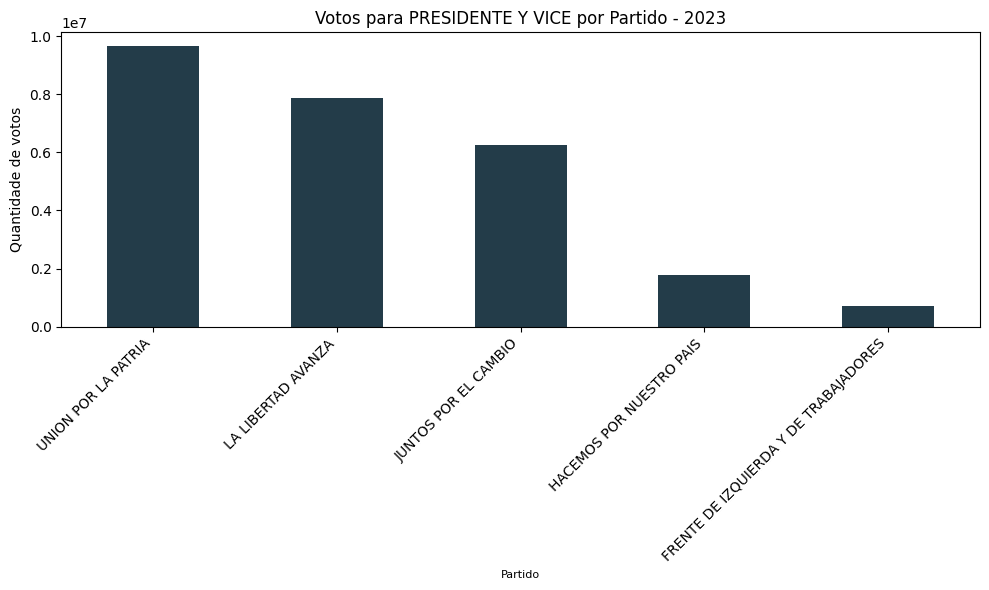

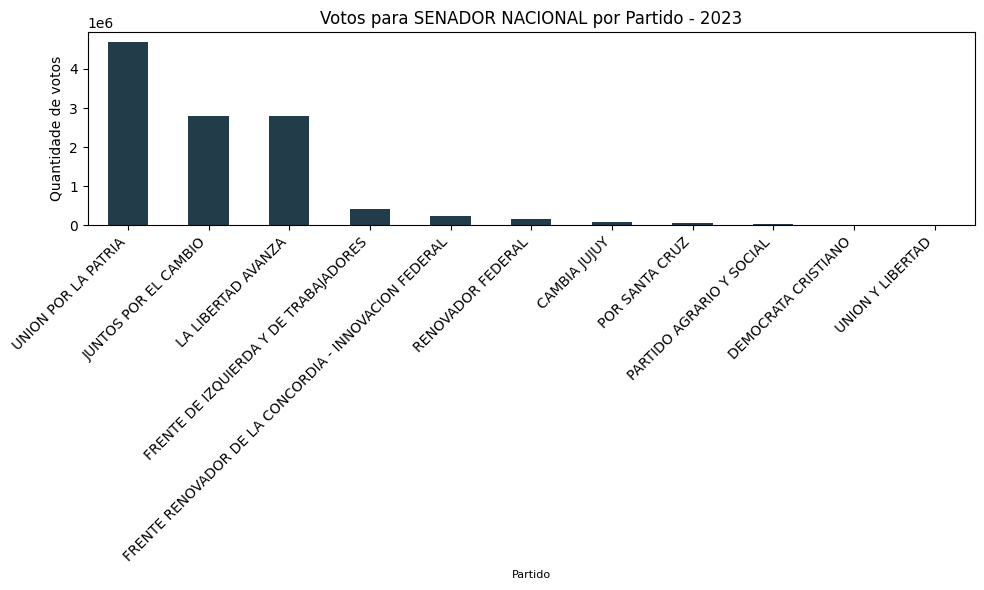

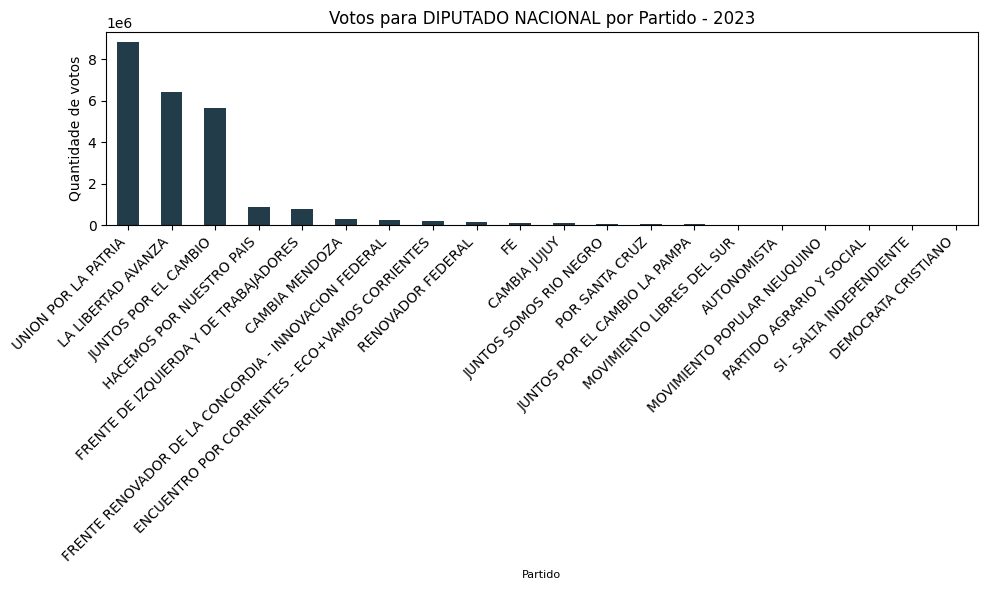

In [7]:
plot_votos(df_2023,"PRESIDENTE Y VICE", 2023)
plot_votos(df_2023,"SENADOR NACIONAL", 2023)
plot_votos(df_2023,"DIPUTADO NACIONAL", 2023)

In [8]:
#Leitura do CSV de 2021 contendo os resultados eleitorais provisorios
df_2021 = read_csv("data\ResultadosElectorales_2021_Generales.csv")
df_2021["agrupacion_nombre"] = df_2021["agrupacion_nombre"].apply(normalize_name,normalizacoes=normalizacoes_2021)

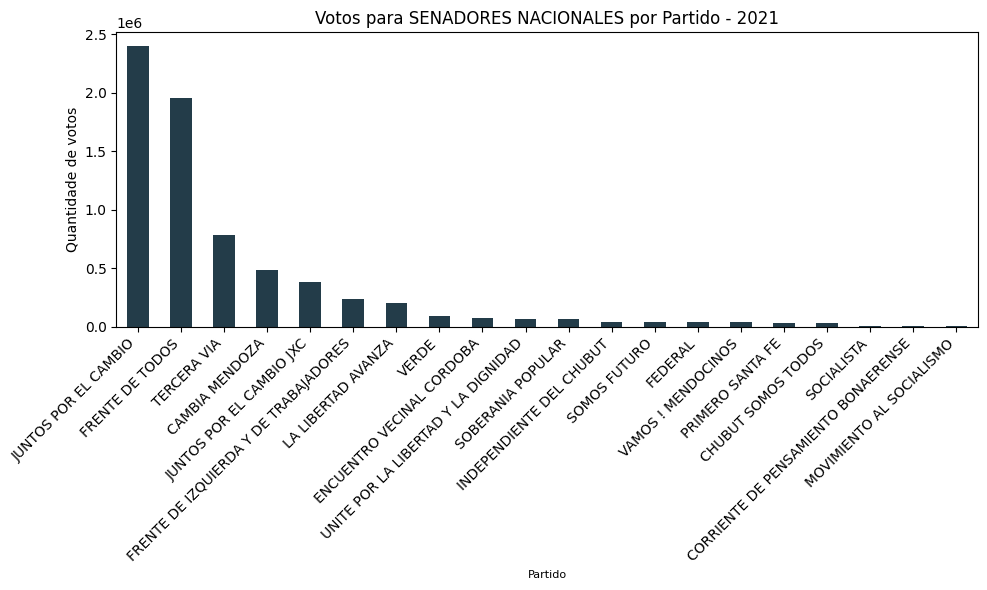

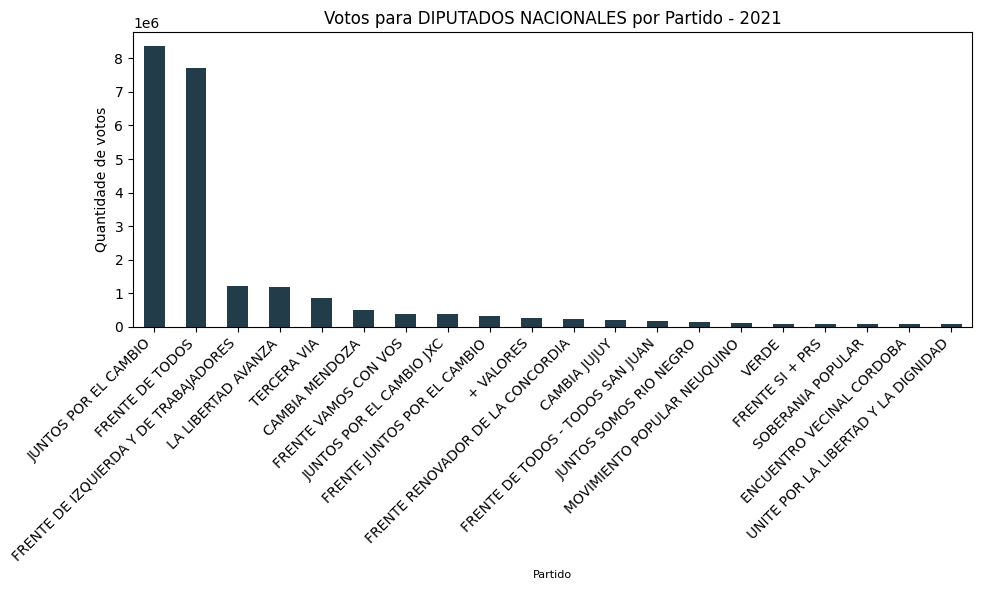

In [9]:
plot_votos(df_2021,"SENADORES NACIONALES", 2021)
plot_votos(df_2021,"DIPUTADOS NACIONALES", 2021)

In [10]:
#Leitura do CSV de 2019 contendo os resultados eleitorais provisorios
df_2019 = read_csv("data\ResultadosElectorales_2019_Generales.csv")
df_2019['agrupacion_nombre'] = df_2019['agrupacion_nombre'].apply(normalize_name,normalizacoes=normalizacoes_2019)

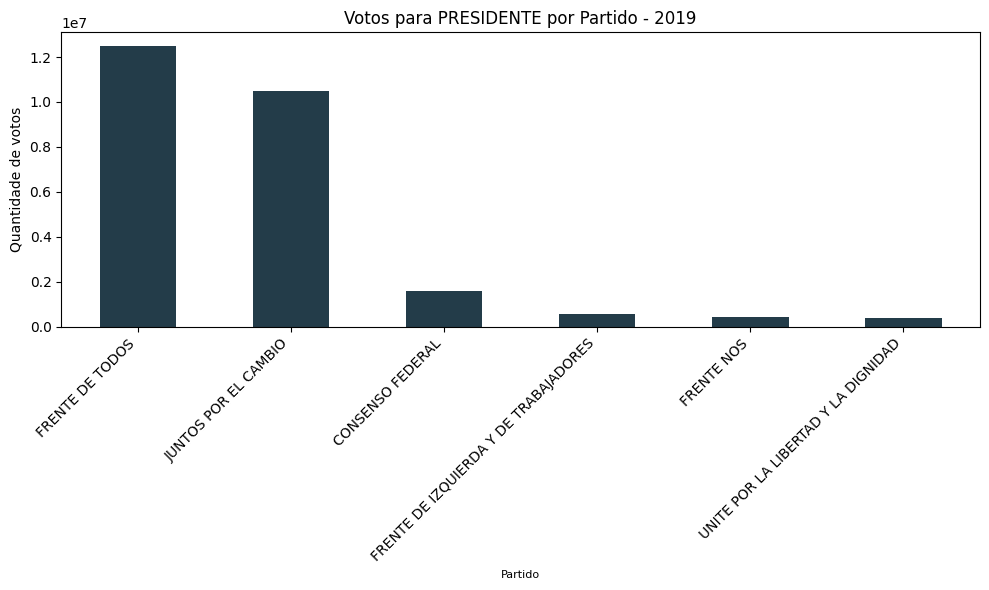

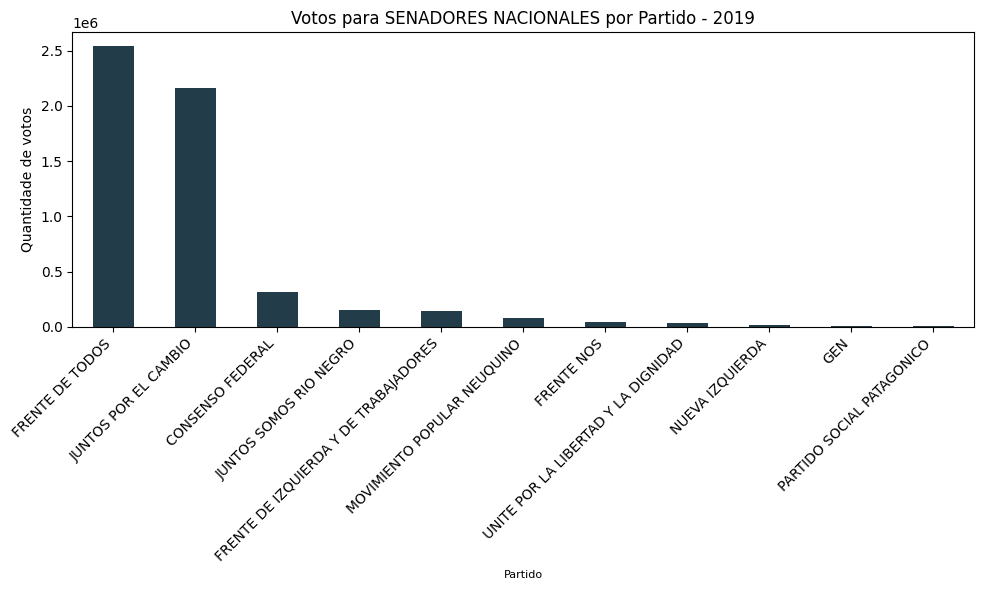

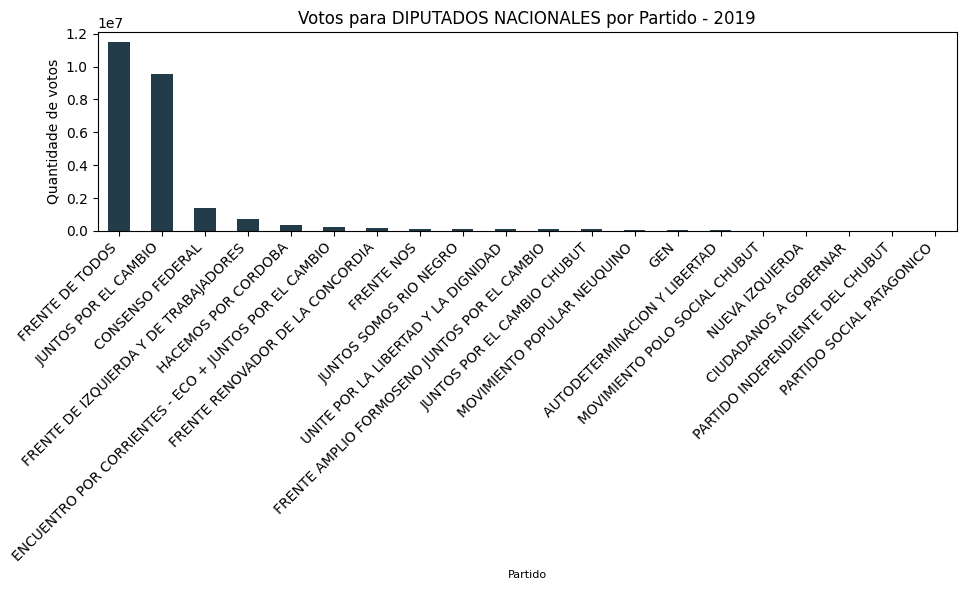

In [11]:
plot_votos(df_2019,"PRESIDENTE", 2019)
plot_votos(df_2019,"SENADORES NACIONALES", 2019)
plot_votos(df_2019,"DIPUTADOS NACIONALES", 2019)

In [12]:
#Leitura do CSV de 2017 contendo os resultados eleitorais provisorios
df_2017 = read_csv("data\ResultadosElectorales2017.csv")
df_2017['agrupacion_nombre'] = df_2017['agrupacion_nombre'].apply(normalize_name,normalizacoes=normalizacoes_2017)

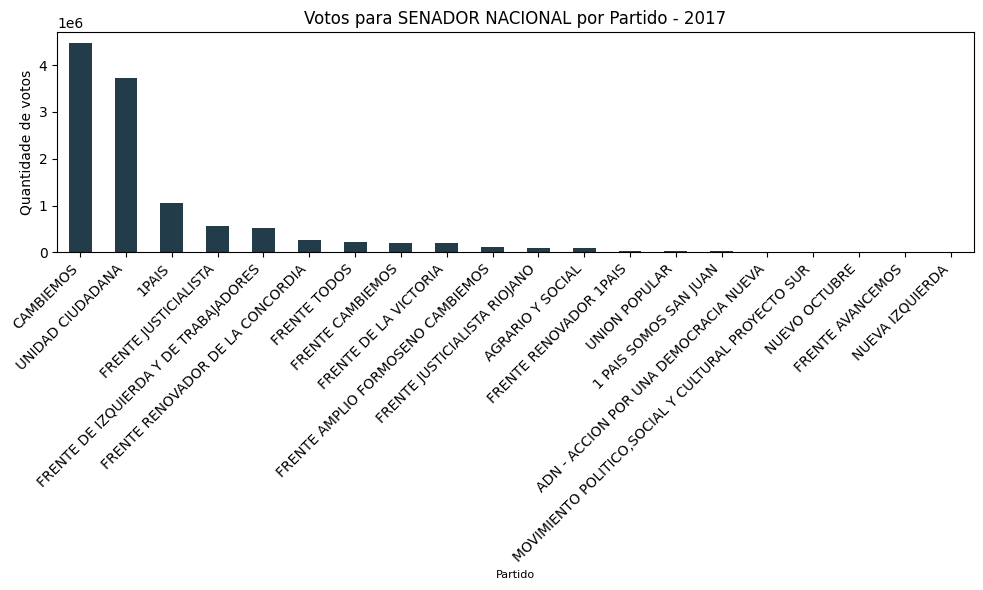

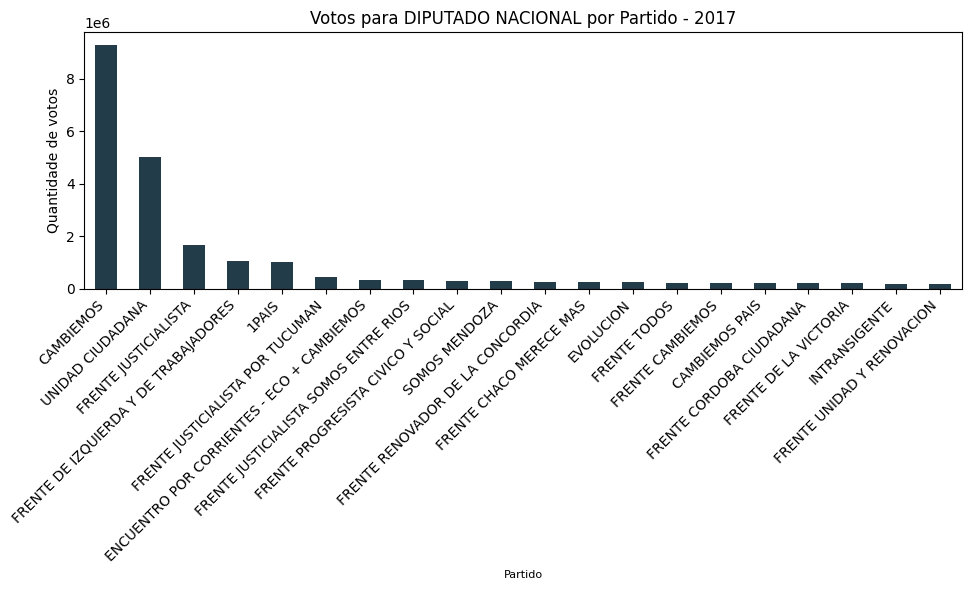

In [13]:
plot_votos(df_2017,"SENADOR NACIONAL", 2017)
plot_votos(df_2017,"DIPUTADO NACIONAL", 2017)

In [14]:
#Leitura do CSV de 2015 contendo os resultados eleitorais provisorios
df_2015 = read_csv("data\ResultadosElectorales2015.csv")
df_2015['agrupacion_nombre'] = df_2015['agrupacion_nombre'].apply(normalize_name,normalizacoes=normalizacoes_2015)

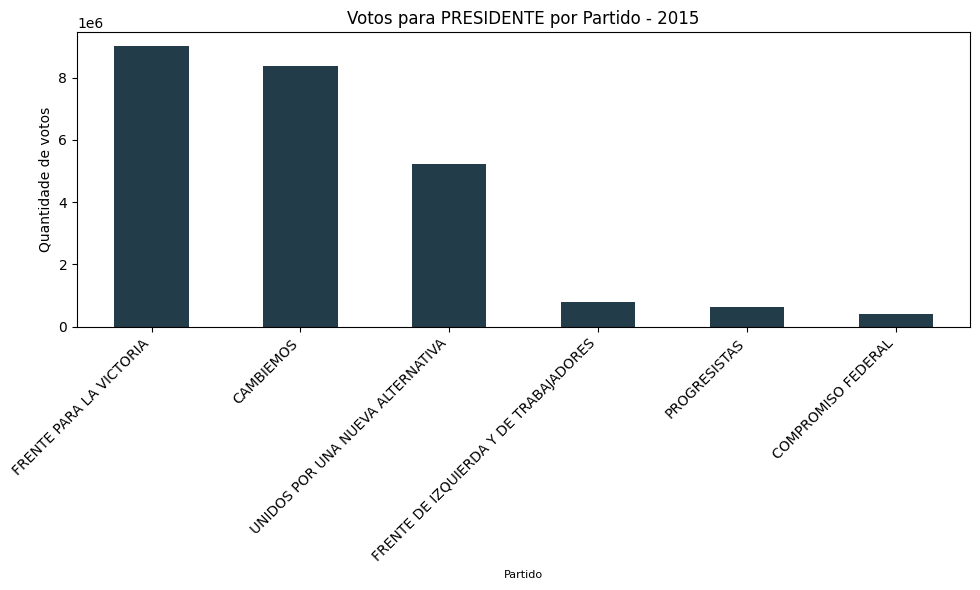

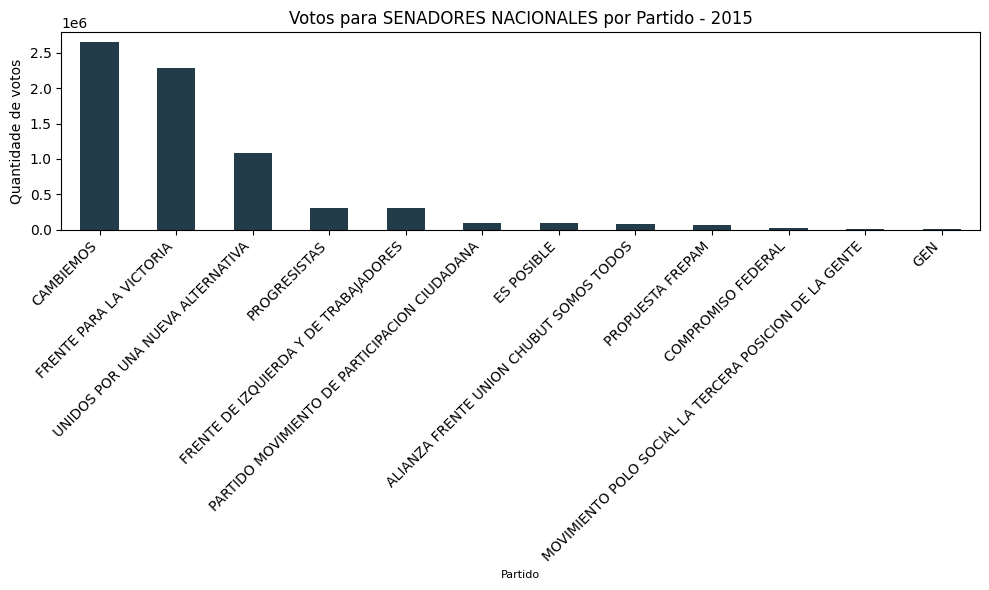

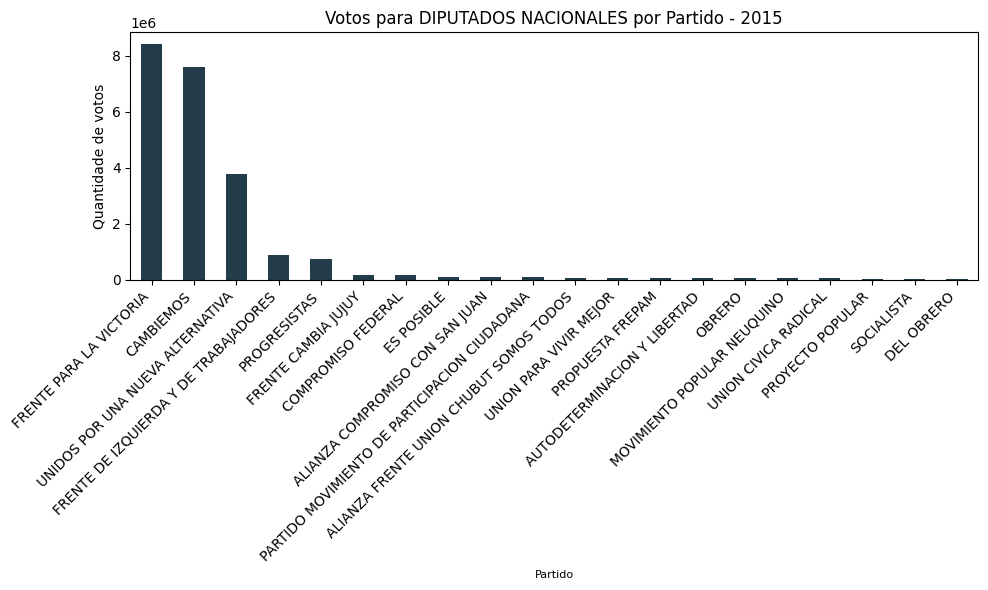

In [15]:
plot_votos(df_2015,"PRESIDENTE", 2015)
plot_votos(df_2015,"SENADORES NACIONALES", 2015)
plot_votos(df_2015,"DIPUTADOS NACIONALES", 2015)

In [16]:
#Leitura do CSV de 2013 contendo os resultados eleitorais provisorios
df_2013 = read_csv("data\ResultadosElectorales2013.csv")
df_2013['agrupacion_nombre'] = df_2013['agrupacion_nombre'].apply(normalize_name,normalizacoes=normalizacoes_2013)

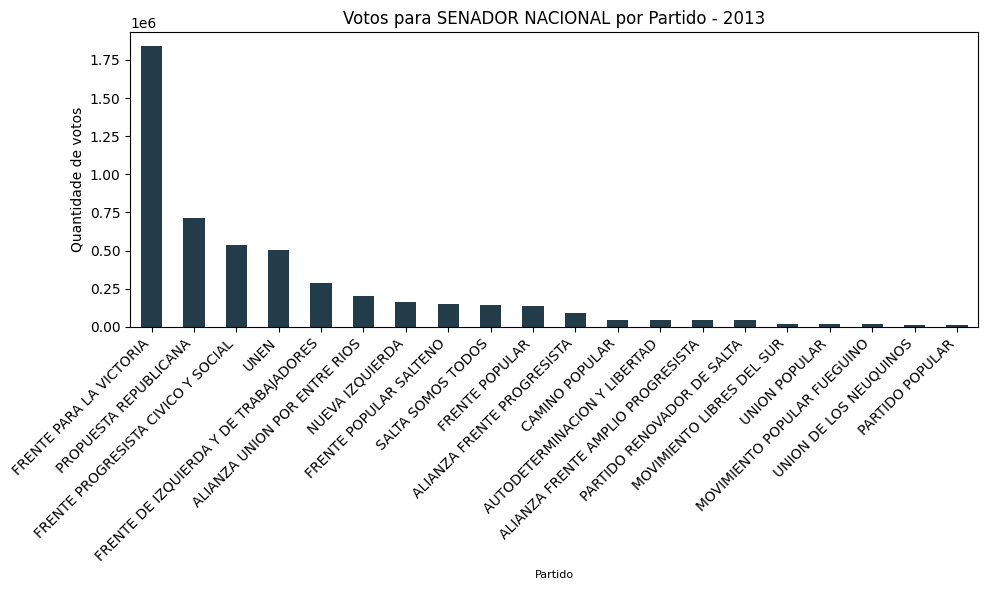

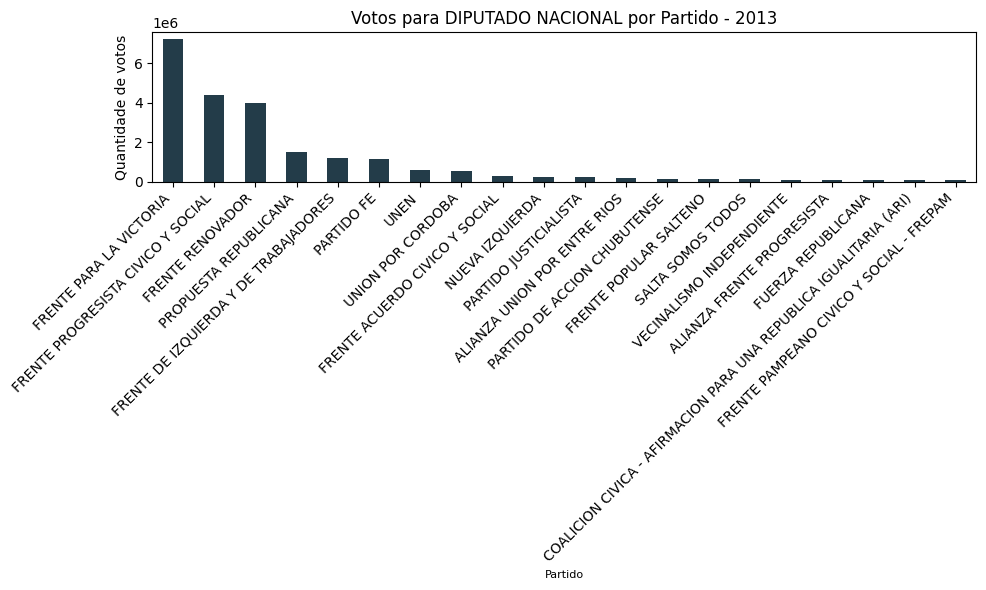

In [17]:
plot_votos(df_2013,"SENADOR NACIONAL", 2013)
plot_votos(df_2013,"DIPUTADO NACIONAL", 2013)

In [18]:
#Leitura do CSV de 2011 contendo os resultados eleitorais provisorios
df_2011 = read_csv("data\ResultadosElectorales2011.csv")
df_2011['agrupacion_nombre'] = df_2011['agrupacion_nombre'].apply(normalize_name,normalizacoes=normalizacoes_2011)

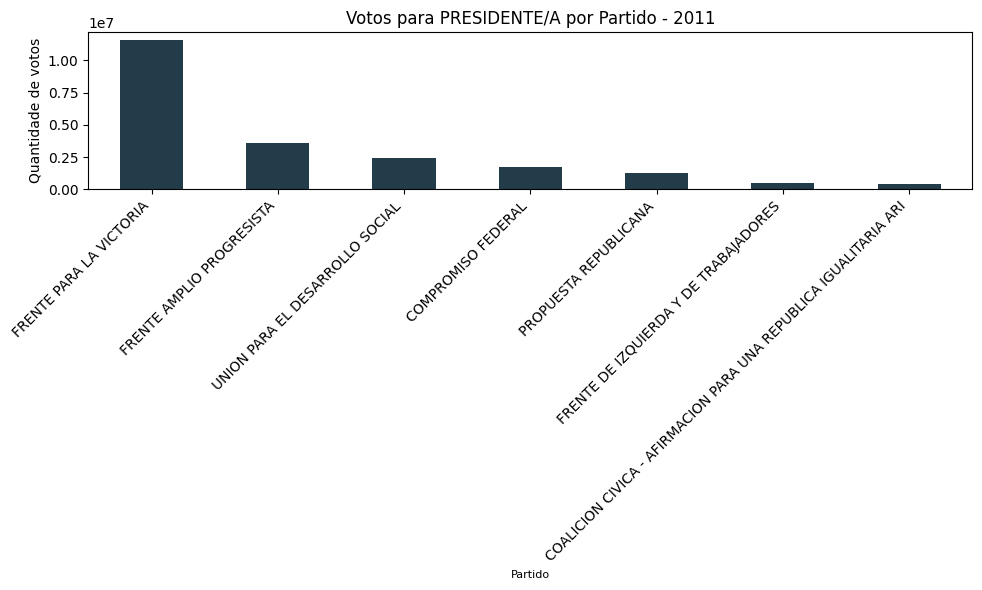

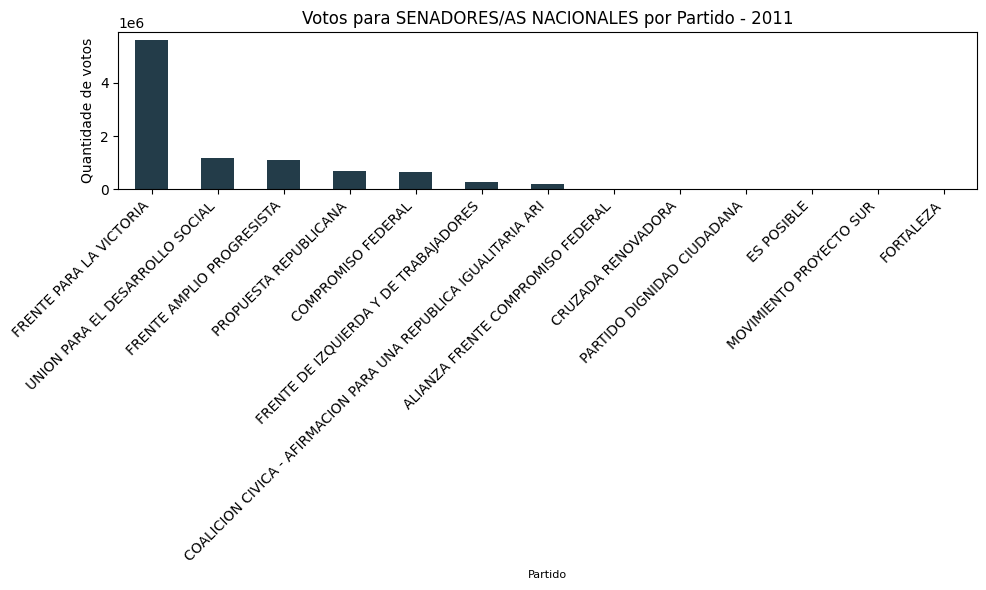

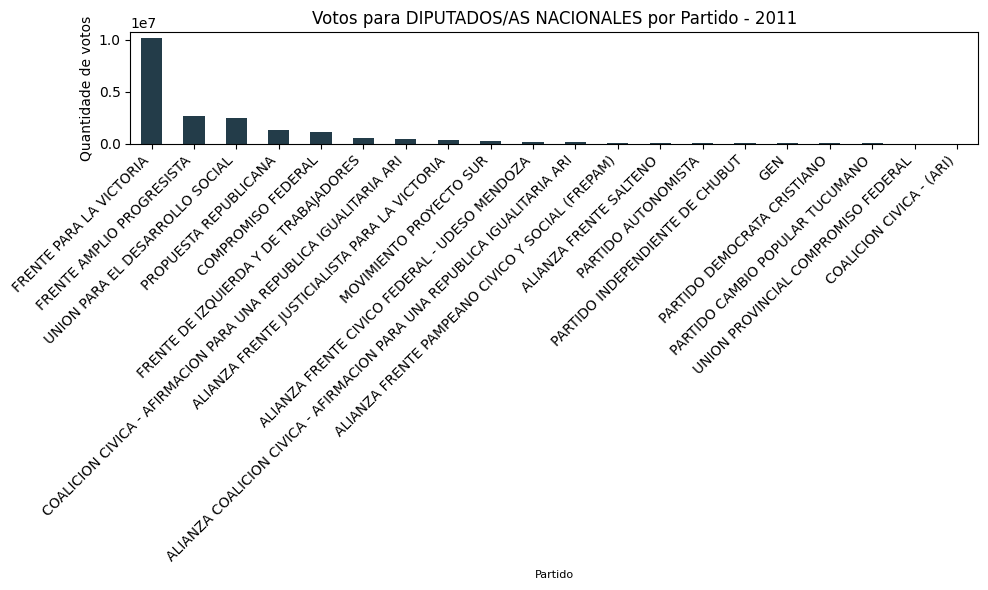

In [19]:
plot_votos(df_2011,"PRESIDENTE/A", 2011)
plot_votos(df_2011,"SENADORES/AS NACIONALES", 2011)
plot_votos(df_2011,"DIPUTADOS/AS NACIONALES", 2011)

Para os anos anteriores a 2011, base de dados provisorias em .csv nao estavam mais disponiveis, portanto, iriamos utilizar as planilhas das contagens definitivas discretizadas por provincia, como o trabalho manualmente nao seria viavel, encontramos em paginas na wikipedia os totais de votos das coalizoes, os quais, após algumas comparacoes com as planilhas definitivas, parecem estar corretos. Para consistencia, vamos manter a métrica de deputados nacionais, mapeando apenas para coalizoes.

In [20]:
#Leitura do CSV de 2009 contendo os resultados eleitorais provisorios
df_2009 = read_csv("data\WikipediaResultadosElectorales_2009.csv")
df_2009['agrupacion_nombre'] = df_2009['agrupacion_nombre'].apply(normalize_name)

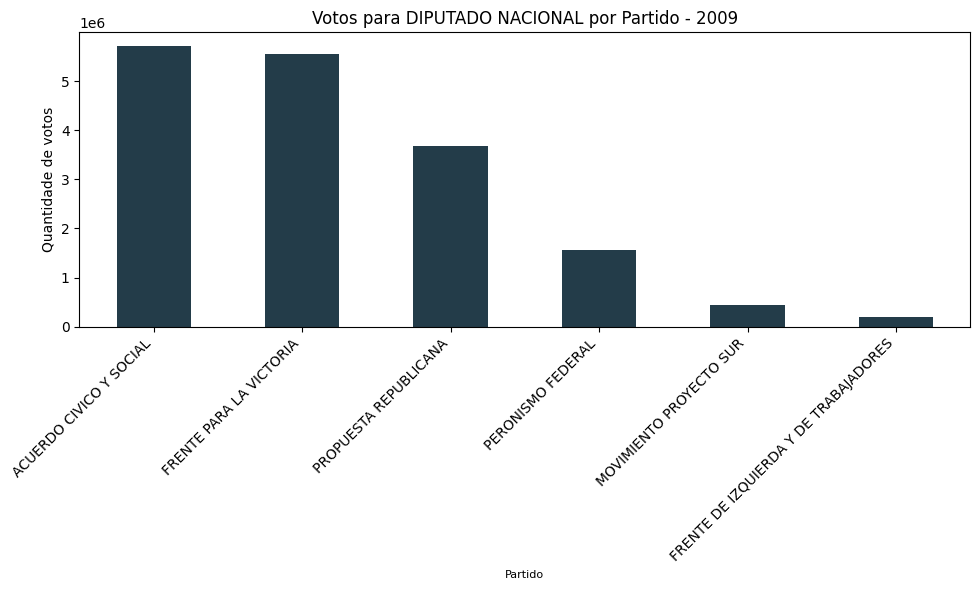

In [21]:
plot_votos(df_2009,"DIPUTADO NACIONAL", 2009)

In [22]:
#Leitura do CSV de 2007 contendo os resultados eleitorais provisorios
df_2007 = read_csv("data\WikipediaResultadosElectorales_2007.csv")
df_2007['agrupacion_nombre'] = df_2007['agrupacion_nombre'].apply(normalize_name)

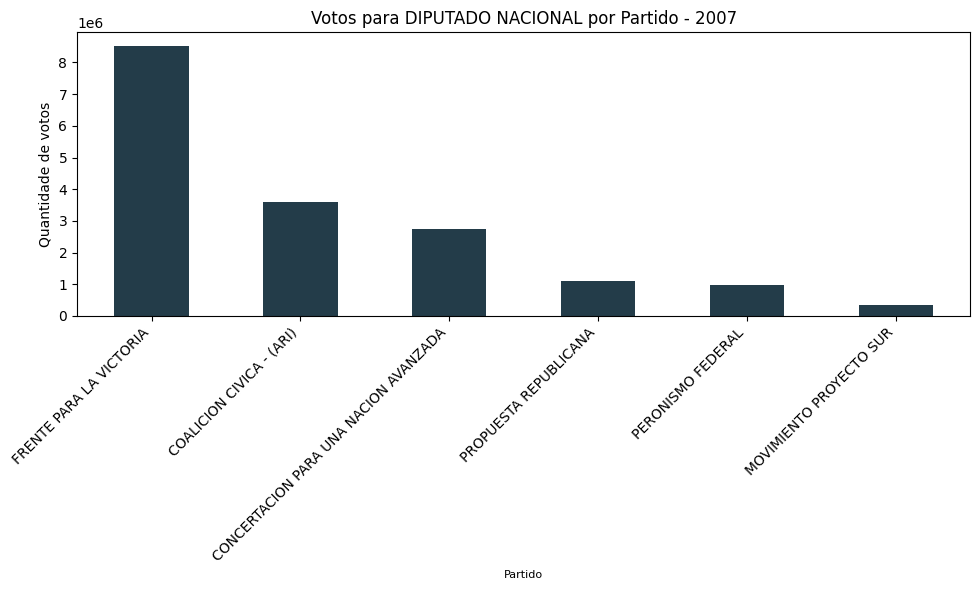

In [23]:
plot_votos(df_2007,"DIPUTADO NACIONAL", 2007)

In [24]:
#Leitura do CSV de 2005 contendo os resultados eleitorais provisorios
df_2005 = read_csv("data\WikipediaResultadosElectorales_2005.csv")
df_2005['agrupacion_nombre'] = df_2005['agrupacion_nombre'].apply(normalize_name)

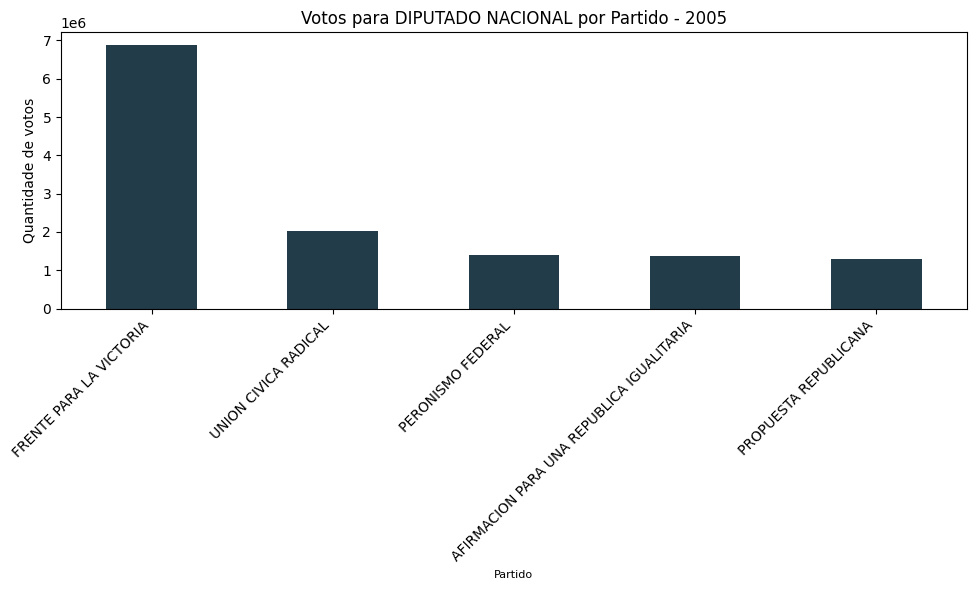

In [25]:
plot_votos(df_2005,"DIPUTADO NACIONAL", 2005)

In [26]:
#Leitura do CSV de 2003 contendo os resultados eleitorais provisorios
df_2003 = read_csv("data\WikipediaResultadosElectorales_2003.csv")
df_2003['agrupacion_nombre'] = df_2003['agrupacion_nombre'].apply(normalize_name)

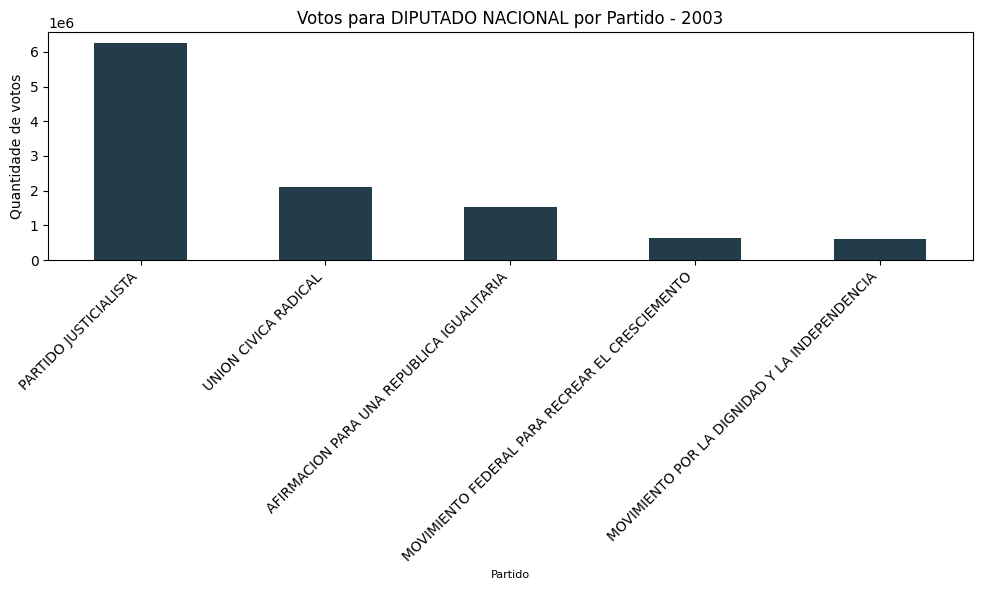

In [27]:
plot_votos(df_2003,"DIPUTADO NACIONAL", 2003)

In [28]:
def calcular_ipp_eleicao(df_votos: pd.DataFrame, df_ipp: pd.DataFrame, filtro_cargo: str ,coluna_partido="agrupacion_nombre"):
    # Filtra apenas a eleicao e o cargo desejado
    df_cargo = df_votos[df_votos["cargo_nombre"] == filtro_cargo].copy()

    # Merge para associar o IPP de cada partido
    df_merge = df_cargo.merge(df_ipp, left_on=coluna_partido, right_on="Partidos/Coalizacoes Nacionais", how='inner')

    # Renomeia a col IPP
    df_merge.rename(columns={"IPP (Índice de Posição Política)": "IPP"}, inplace=True)

    # Converte para numérico 
    df_merge["IPP"] = pd.to_numeric(df_merge["IPP"], errors="coerce")
    df_merge["votos_cantidad"] = pd.to_numeric(df_merge["votos_cantidad"], errors="coerce")
    
    # Calcula peso IPP * votos
    df_merge["IPP_ponderado"] = df_merge["IPP"] * df_merge["votos_cantidad"]

   # Total de votos válidos com IPP
    total_votos = df_merge["votos_cantidad"].sum()

    # Média ponderada
    ipp_total = df_merge["IPP_ponderado"].sum() / total_votos if total_votos > 0 else None

    return ipp_total, df_merge

In [29]:
df_ipp = read_csv("data\PartidosNacionaisArgentinaIPP.csv")
df_ipp['Partidos/Coalizacoes Nacionais'] = df_ipp['Partidos/Coalizacoes Nacionais']

In [30]:
anos_dfs_deputados_ate_2011 = {
    2023: (df_2023, "DIPUTADO NACIONAL"),
    2021: (df_2021, "DIPUTADOS NACIONALES"),
    2019: (df_2019, "DIPUTADOS NACIONALES"),
    2017: (df_2017, "DIPUTADO NACIONAL"),
    2015: (df_2015, "DIPUTADOS NACIONALES"),
    2013: (df_2013, "DIPUTADO NACIONAL"),
    2011: (df_2011, "DIPUTADOS/AS NACIONALES")
}

anos_dfs_deputados = {
    2023: (df_2023, "DIPUTADO NACIONAL"),
    2021: (df_2021, "DIPUTADOS NACIONALES"),
    2019: (df_2019, "DIPUTADOS NACIONALES"),
    2017: (df_2017, "DIPUTADO NACIONAL"),
    2015: (df_2015, "DIPUTADOS NACIONALES"),
    2013: (df_2013, "DIPUTADO NACIONAL"),
    2011: (df_2011, "DIPUTADOS/AS NACIONALES"),
    2009: (df_2009, "DIPUTADO NACIONAL"),
    2007: (df_2007, "DIPUTADO NACIONAL"),
    2005: (df_2005, "DIPUTADO NACIONAL"),
    2003: (df_2003, "DIPUTADO NACIONAL")
}

anos_dfs_senadores= {
    2023: (df_2023, "SENADOR NACIONAL"),
    2021: (df_2021, "SENADORES NACIONALES"),
    2019: (df_2019, "SENADORES NACIONALES"),
    2017: (df_2017, "SENADOR NACIONAL"),
    2015: (df_2015, "SENADORES NACIONALES"),
    2013: (df_2013, "SENADOR NACIONAL"),
    2011: (df_2011, "SENADORES/AS NACIONALES")

}

In [31]:
def exibir_ipp(dict_dep: dict, dict_sen:dict, df_ipp):
    resultados = {}
    ipps_deputados = {}
    ipps_senadores = {}

    # loop sobre o dicionario de senadores
    for ano, (df, cargo) in dict_sen.items():
        ipp_total_senadores, df_merge = calcular_ipp_eleicao(df, df_ipp, cargo)
        resultados[ano] = (ipp_total_senadores, df_merge)
        ipps_senadores[ano] = ipp_total_senadores
        print(f"IPP total da eleição para Senadores Nacionais {ano}: {ipp_total_senadores}")

    # loop sobre o dicionario de deputados
    for ano, (df, cargo) in dict_dep.items():
        ipp_total_deputados, df_merge = calcular_ipp_eleicao(df, df_ipp, cargo)
        resultados[ano] = (ipp_total_deputados, df_merge)
        ipps_deputados[ano] = ipp_total_deputados
        print(f"IPP total da eleição para Deputados Nacionais {ano}: {ipp_total_deputados}")

 
    
    return ipps_deputados, ipps_senadores, resultados
        

In [32]:
anos_dep_ate_2011 = [2011,2013,2015,2017,2019,2021,2023]
anos_dep = [2003,2005,2007,2009,2011,2013,2015,2017,2019,2021,2023, 2025]
anos_sen = [2011,2013,2015,2017,2019,2021,2023, 2025]

def exibir_grafico_ipp(valores: list, ipps: dict, cargo: str, anos:list):
    plt.figure(figsize=(8, 5))
    plt.bar(anos, valores, color="#233C49")

    plt.xlabel("Ano da Eleição")
    plt.ylabel("IPP Total")
    plt.title(f"IPP Total por Eleição ({anos[0]}-{anos[-1]}) ({cargo})")
    plt.axhline(0, color="black", linewidth=0.8)

    plt.xticks(anos)

    # Mostrar valores acima das barras
    for i, v in enumerate(valores):
        if anos[i] in ipps:
            plt.text(anos[i], v + 0.01 if v >= 0 else v - 0.03, f"{v:.2f}", 
                    ha="center", fontsize=9)

    plt.show()

In [33]:
ipps_deputados, ipps_senadores, _ = exibir_ipp(anos_dfs_deputados_ate_2011, anos_dfs_senadores, df_ipp=df_ipp)

IPP total da eleição para Senadores Nacionais 2023: 0.26366122612414844
IPP total da eleição para Senadores Nacionais 2021: 0.14141525726974044
IPP total da eleição para Senadores Nacionais 2019: -0.12534043722228497
IPP total da eleição para Senadores Nacionais 2017: -0.18695628626789557
IPP total da eleição para Senadores Nacionais 2015: 0.13839692206824392
IPP total da eleição para Senadores Nacionais 2013: -0.7215575051102521
IPP total da eleição para Senadores Nacionais 2011: -0.5038680121091081
IPP total da eleição para Deputados Nacionais 2023: 0.36428512212876535
IPP total da eleição para Deputados Nacionais 2021: 0.04975566298576286
IPP total da eleição para Deputados Nacionais 2019: -0.13970009079870038
IPP total da eleição para Deputados Nacionais 2017: -0.054095742185807184
IPP total da eleição para Deputados Nacionais 2015: 0.06626060785559434
IPP total da eleição para Deputados Nacionais 2013: -0.8053536521836993
IPP total da eleição para Deputados Nacionais 2011: -0.4944

In [34]:
valores_deputados = list(ipps_deputados.get(ano, 0) for ano in anos_dep_ate_2011)
valores_senadores = list(ipps_senadores.get(ano, 0) for ano in anos_sen)

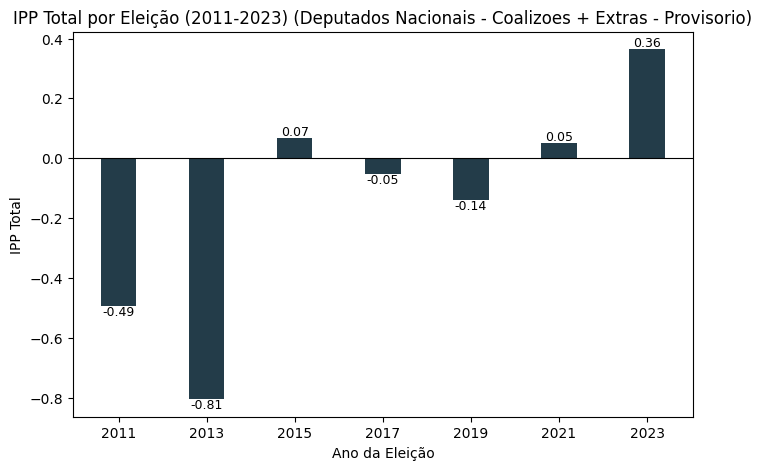

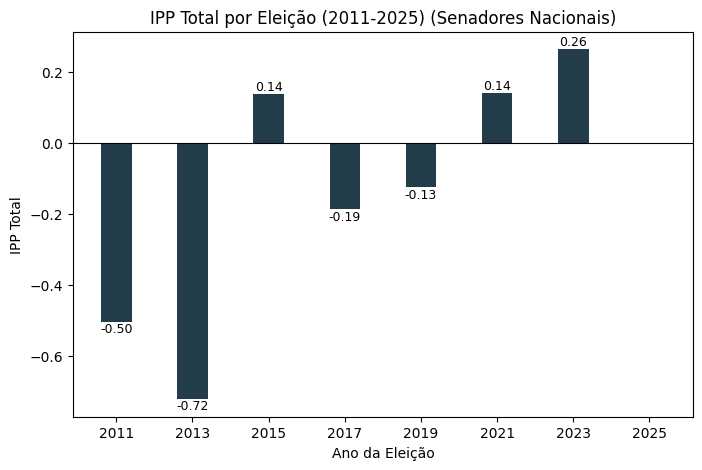

In [35]:
exibir_grafico_ipp(valores_deputados, ipps_deputados, "Deputados Nacionais - Coalizoes + Extras - Provisorio", anos_dep_ate_2011)
exibir_grafico_ipp(valores_senadores, ipps_senadores,"Senadores Nacionais",anos_sen )

Agora vamos analisar apenas para as coalizões, excluindo os partidos nacionais que foram mapeados.

In [36]:
df_ipp_coalizoes = read_csv("data\CoalizoesArgentinaIPP.csv")
df_ipp_coalizoes['Partidos/Coalizacoes Nacionais'] = df_ipp_coalizoes['Partidos/Coalizacoes Nacionais']

In [37]:
ipps_deputados_coalizoes, ipps_senadores_coalizoes, resultados = exibir_ipp(anos_dfs_deputados, anos_dfs_senadores, df_ipp=df_ipp_coalizoes)

IPP total da eleição para Senadores Nacionais 2023: 0.26366122612414844
IPP total da eleição para Senadores Nacionais 2021: 0.06817376738936451
IPP total da eleição para Senadores Nacionais 2019: -0.12553072450029834
IPP total da eleição para Senadores Nacionais 2017: -0.18627811314417933
IPP total da eleição para Senadores Nacionais 2015: 0.08587510185997477
IPP total da eleição para Senadores Nacionais 2013: -0.7202269218364706
IPP total da eleição para Senadores Nacionais 2011: -0.5038680121091081
IPP total da eleição para Deputados Nacionais 2023: 0.358797923707037
IPP total da eleição para Deputados Nacionais 2021: 0.029818876028965262
IPP total da eleição para Deputados Nacionais 2019: -0.13984610286197208
IPP total da eleição para Deputados Nacionais 2017: -0.05230391580802433
IPP total da eleição para Deputados Nacionais 2015: 0.028872678220787568
IPP total da eleição para Deputados Nacionais 2013: -0.8052475059589159
IPP total da eleição para Deputados Nacionais 2011: -0.50093

In [38]:
valores_deputados_coalizoes = list(ipps_deputados_coalizoes.get(ano, 0) for ano in anos_dep)
valores_senadores_coalizoes = list(ipps_senadores_coalizoes.get(ano, 0) for ano in anos_sen)

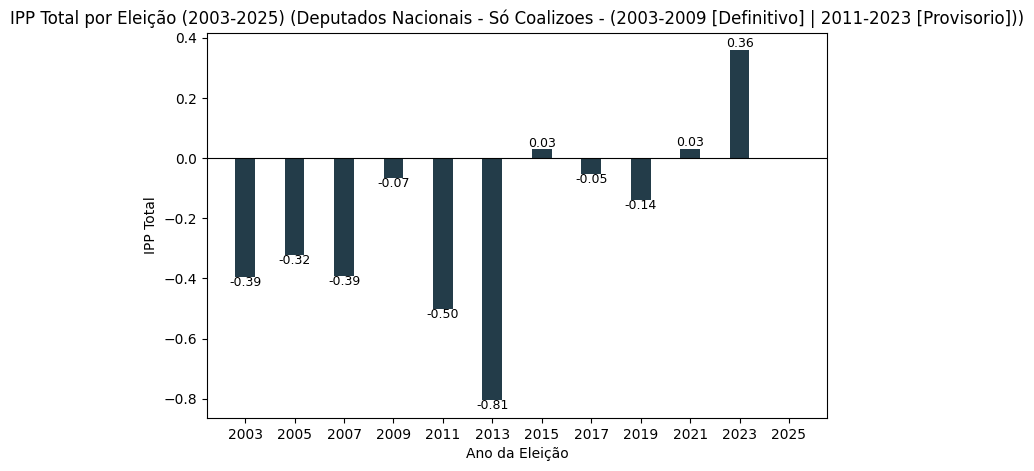

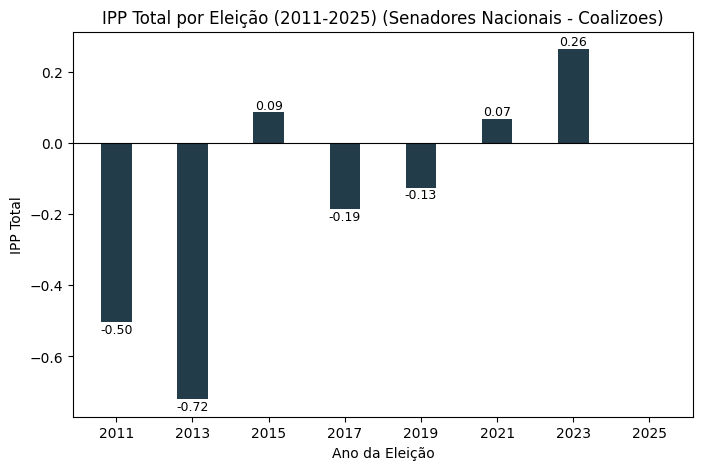

In [39]:
exibir_grafico_ipp(valores_deputados_coalizoes, ipps_deputados_coalizoes, "Deputados Nacionais - Só Coalizoes - (2003-2009 [Definitivo] | 2011-2023 [Provisorio])", anos_dep)
exibir_grafico_ipp(valores_senadores_coalizoes, ipps_senadores_coalizoes,"Senadores Nacionais - Coalizoes", anos_sen )

A partir de agora, vamos finalmente chegar ao nosso grafico de IPP definitivo, no qual vamos usar todos os dados provenientes da wikipedia para todos os anos, somente com coalizoes, que parece traduzir exatamente a contagem definitiva.

In [40]:
df_2025_definitivo = read_csv("data\WikipediaResultadosElectorales_2025.csv")
df_2025_definitivo['agrupacion_nombre'] = df_2025_definitivo['agrupacion_nombre'].apply(normalize_name)

df_2023_definitivo = read_csv("data\WikipediaResultadosElectorales_2023.csv")
df_2023_definitivo['agrupacion_nombre'] = df_2023_definitivo['agrupacion_nombre'].apply(normalize_name)

df_2021_definitivo = read_csv("data\WikipediaResultadosElectorales_2021.csv")
df_2021_definitivo['agrupacion_nombre'] = df_2021_definitivo['agrupacion_nombre'].apply(normalize_name)

df_2019_definitivo = read_csv("data\WikipediaResultadosElectorales_2019.csv")
df_2019_definitivo['agrupacion_nombre'] = df_2019_definitivo['agrupacion_nombre'].apply(normalize_name)

df_2017_definitivo = read_csv("data\WikipediaResultadosElectorales_2017.csv")
df_2017_definitivo['agrupacion_nombre'] = df_2017_definitivo['agrupacion_nombre'].apply(normalize_name)

df_2015_definitivo = read_csv("data\WikipediaResultadosElectorales_2015.csv")
df_2015_definitivo['agrupacion_nombre'] = df_2015_definitivo['agrupacion_nombre'].apply(normalize_name)

df_2013_definitivo = read_csv("data\WikipediaResultadosElectorales_2013.csv")
df_2013_definitivo['agrupacion_nombre'] = df_2013_definitivo['agrupacion_nombre'].apply(normalize_name)

df_2011_definitivo = read_csv("data\WikipediaResultadosElectorales_2011.csv")
df_2011_definitivo['agrupacion_nombre'] = df_2011_definitivo['agrupacion_nombre'].apply(normalize_name)

IPP total da eleição para Senadores Nacionais 2023: 0.26366122612414844
IPP total da eleição para Senadores Nacionais 2021: 0.06817376738936451
IPP total da eleição para Senadores Nacionais 2019: -0.12553072450029834
IPP total da eleição para Senadores Nacionais 2017: -0.18627811314417933
IPP total da eleição para Senadores Nacionais 2015: 0.08587510185997477
IPP total da eleição para Senadores Nacionais 2013: -0.7202269218364706
IPP total da eleição para Senadores Nacionais 2011: -0.5038680121091081
IPP total da eleição para Deputados Nacionais 2025: 0.4290338870707111
IPP total da eleição para Deputados Nacionais 2023: 0.4595533723029791
IPP total da eleição para Deputados Nacionais 2021: 0.08809902861009594
IPP total da eleição para Deputados Nacionais 2019: -0.1186462800879284
IPP total da eleição para Deputados Nacionais 2017: -0.16592435640069614
IPP total da eleição para Deputados Nacionais 2015: 0.041566262785995116
IPP total da eleição para Deputados Nacionais 2013: -0.8579168

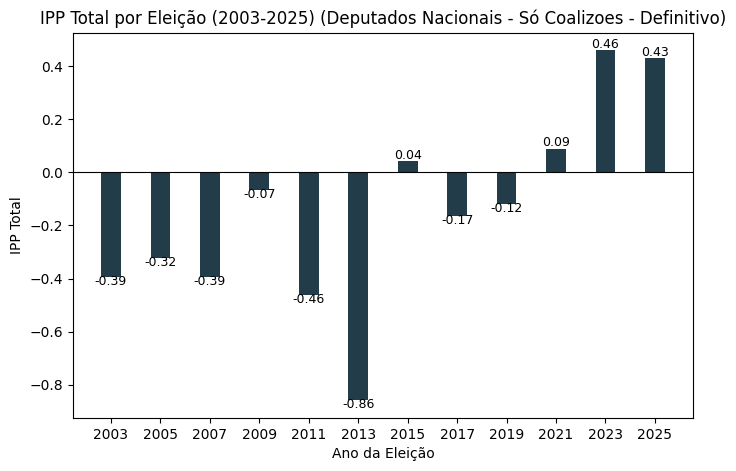

In [41]:
anos_dfs_deputados_definitivo = {
    2025: (df_2025_definitivo, "DIPUTADO NACIONAL"),
    2023: (df_2023_definitivo, "DIPUTADO NACIONAL"),
    2021: (df_2021_definitivo, "DIPUTADO NACIONAL"),
    2019: (df_2019_definitivo, "DIPUTADO NACIONAL"),
    2017: (df_2017_definitivo, "DIPUTADO NACIONAL"),
    2015: (df_2015_definitivo, "DIPUTADO NACIONAL"),
    2013: (df_2013_definitivo, "DIPUTADO NACIONAL"),
    2011: (df_2011_definitivo, "DIPUTADO NACIONAL"),
    2009: (df_2009, "DIPUTADO NACIONAL"),
    2007: (df_2007, "DIPUTADO NACIONAL"),
    2005: (df_2005, "DIPUTADO NACIONAL"),
    2003: (df_2003, "DIPUTADO NACIONAL")
}

ipps_deputados_definitivo, _, resultados = exibir_ipp(anos_dfs_deputados_definitivo, anos_dfs_senadores, df_ipp=df_ipp_coalizoes)
#lista com os ipps para deputados nacionais definitivo de 2003 a 2023
valores_deputados_definitivo  = list(ipps_deputados_definitivo.get(ano, 0) for ano in anos_dep)
exibir_grafico_ipp(valores_deputados_definitivo, ipps_deputados_definitivo, "Deputados Nacionais - Só Coalizoes - Definitivo", anos_dep)


Ate agora, todos nossos esforços se concentraram em obter a melhor metrica do IPP e os melhores dados possiveis. Concluimos portanto que o IPP para Deputados Nacionais é melhor do que o IPP para Senadores Nacionais, já que de 2 em 2 anos, apenas 8 provincias votam para senadores, renovando 1/3 das cadeiras, enquanto para deputados, todas as provincias votam de 2 em 2 anos, dessa forma, ao escolher deputados nacionais, removemos algum viés possível em algum ano de eleição no qual várias províncias de mesma ideologia votam. Além disso, notamos que utilizar apenas coalizões ou utilizar coalizões e alguns partidos fora delas é pouco diferente para o cálculo do IPP, a esmagadora maioria do IPP é proveniente dos votos nas coalizões, sendo assim, adicionar ou não partidos fora de coalizões é irrisório. Outra conclusão que chegamos é que ter acesso ou não às contagens definitivas também não influencia muito na tendência e na amplitude do IPP, sendo assim, caso possua apenas votos provisórios, pelo menos para deputados nacionais, o IPP parece funcionar bem. Dessa forma, concluímos que a melhor métrica foi Deputados Nacionais, somente com coalizões, retirando os dados das contagens definitivas da Wikipedia, para manter a consistência entre 2003 e 2023 da proveniência dos dados.

Vamos agora iniciar nosso estudo de custo de governabilidade para os presidentes com relação ao posicionamento político do Congresso e do incumbente.

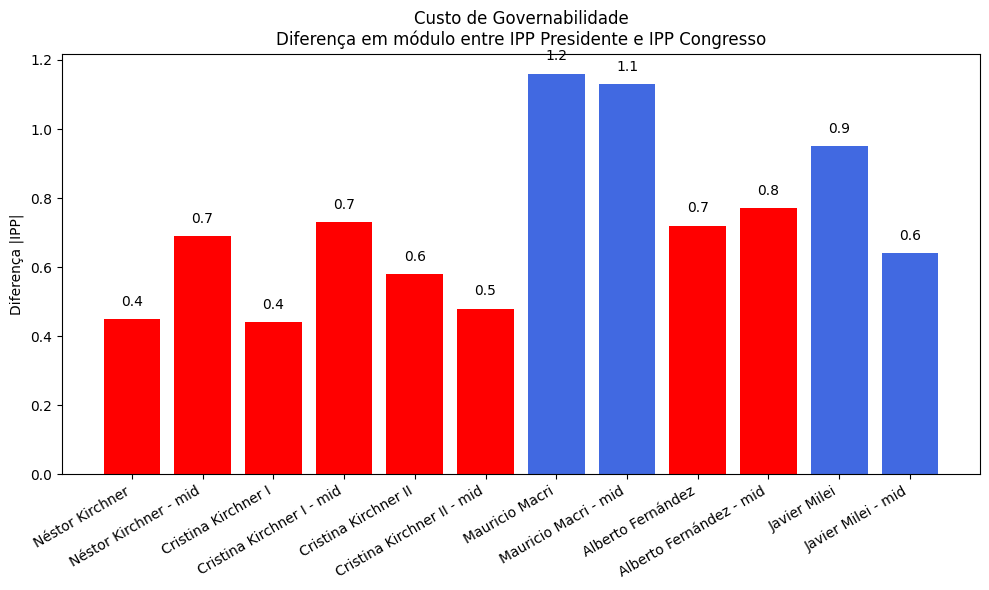

In [55]:
# dicionario com presidentes por ano e seus ipps
presidentes = {
    "2003": ("Néstor Kirchner",-1),
    "2005": ("Néstor Kirchner - mid",-1),
    "2007": ("Cristina Kirchner I",-1),
    "2009": ("Cristina Kirchner I - mid",-1),
    "2011": ("Cristina Kirchner II",-1),
    "2013": ("Cristina Kirchner II - mid",-1),
    "2015": ("Mauricio Macri",1),
    "2017": ("Mauricio Macri - mid",1),
    "2019": ("Alberto Fernández",-1),
    "2021": ("Alberto Fernández - mid",-1),
    "2023": ("Javier Milei",1),
    "2025": ("Javier Milei - mid", 1)
}
# ipp das cadeiras do congresso
ipp_congresso = [-0.55, -0.31, -0.56, -0.27, -0.42, -0.52, -0.16, -0.13, -0.28, -0.23, 0.05, 0.36]

anos = list(presidentes.keys())
anos_num = [int(ano) for ano in anos]
nomes_presidentes = [presidentes[ano][0] for ano in anos]
ipps_presidentes = [presidentes[ano][1] for ano in anos]

# calcular custos de governabilidade (diferença em módulo entre ipp presidente e congresso)
custo_governabilidade = [abs(ipps_presidentes[i] - ipp_congresso[i]) for i in range(len(anos))]
cores = []
for ipp_pres in ipps_presidentes:
    if ipp_pres > 0:
        cores.append("royalblue")
    elif ipp_pres < 0:
        cores.append("red")
    else:
        cores.append("orange")

# gráfico
plt.figure(figsize=(10,6))
bars = plt.bar(nomes_presidentes, custo_governabilidade, color=cores)

# valores no topo
for bar, custo in zip(bars, custo_governabilidade):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.03, 
            f"{custo:.1f}", ha='center', va='bottom', fontsize=10)

plt.title("Custo de Governabilidade\nDiferença em módulo entre IPP Presidente e IPP Congresso")
plt.ylabel("Diferença |IPP|")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

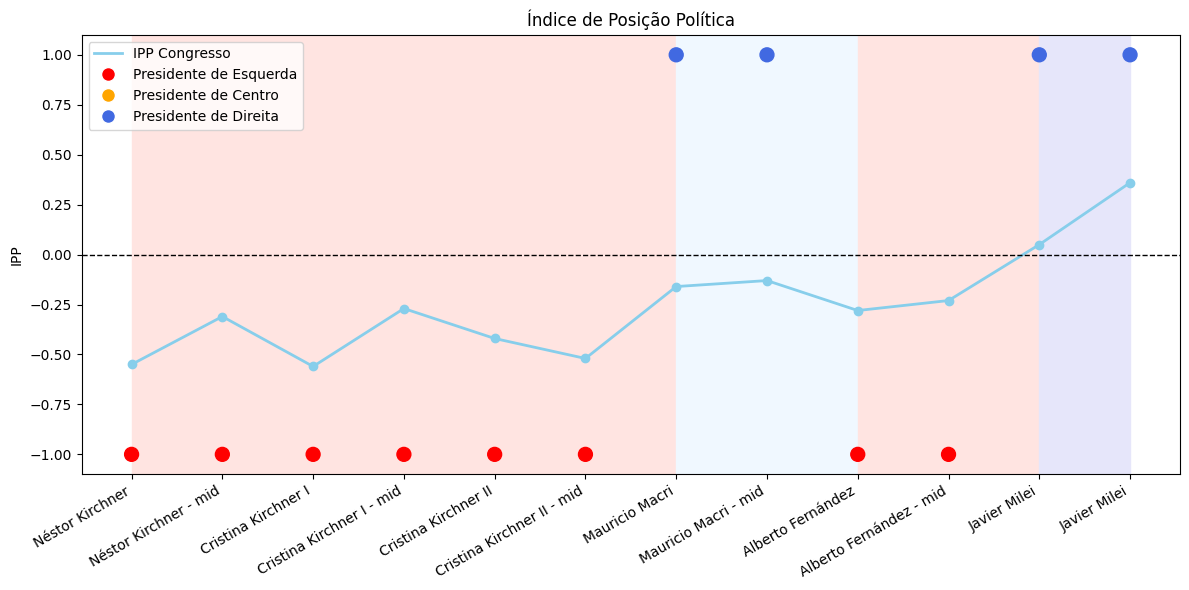

In [52]:
plt.figure(figsize=(12,6))

#linha do congresso
plt.plot(anos_num, ipp_congresso, marker='o', color='skyblue', linewidth=2, label='IPP Congresso')

#pontos para os presidentes
plt.scatter(anos_num, ipps_presidentes, color=cores, s=100, zorder=3)

# faixas de fundo (mandatos)
cor_mandatos = [
    (2003, 2007, "mistyrose"),    # Nestor Kirchner
    (2007, 2015, "mistyrose"),    # Cristina Kirchner
    (2015, 2019, "aliceblue"),     # Macri
    (2019, 2023, "mistyrose"),    # Alberto
    (2023, 2025, "lavender")      # Milei
]

for inicio, fim, cor in cor_mandatos:
    plt.axvspan(xmin=inicio, xmax=fim, color=cor, alpha=1, zorder=0)

# rótulos
plt.title("Índice de Posição Política")
plt.ylabel("IPP")
plt.xticks(anos_num, nomes_presidentes, rotation=30, ha="right")
plt.axhline(0, color="black", linestyle="--", linewidth=1)

# legenda customizada
legend_elements = [
    Line2D([0], [0], color="skyblue", lw=2, label="IPP Congresso"),
    Line2D([0], [0], marker='o', color='w', label="Presidente de Esquerda", markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label="Presidente de Centro", markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label="Presidente de Direita", markerfacecolor='royalblue', markersize=10)
]
plt.legend(handles=legend_elements, loc="upper left")

plt.tight_layout()
plt.show()

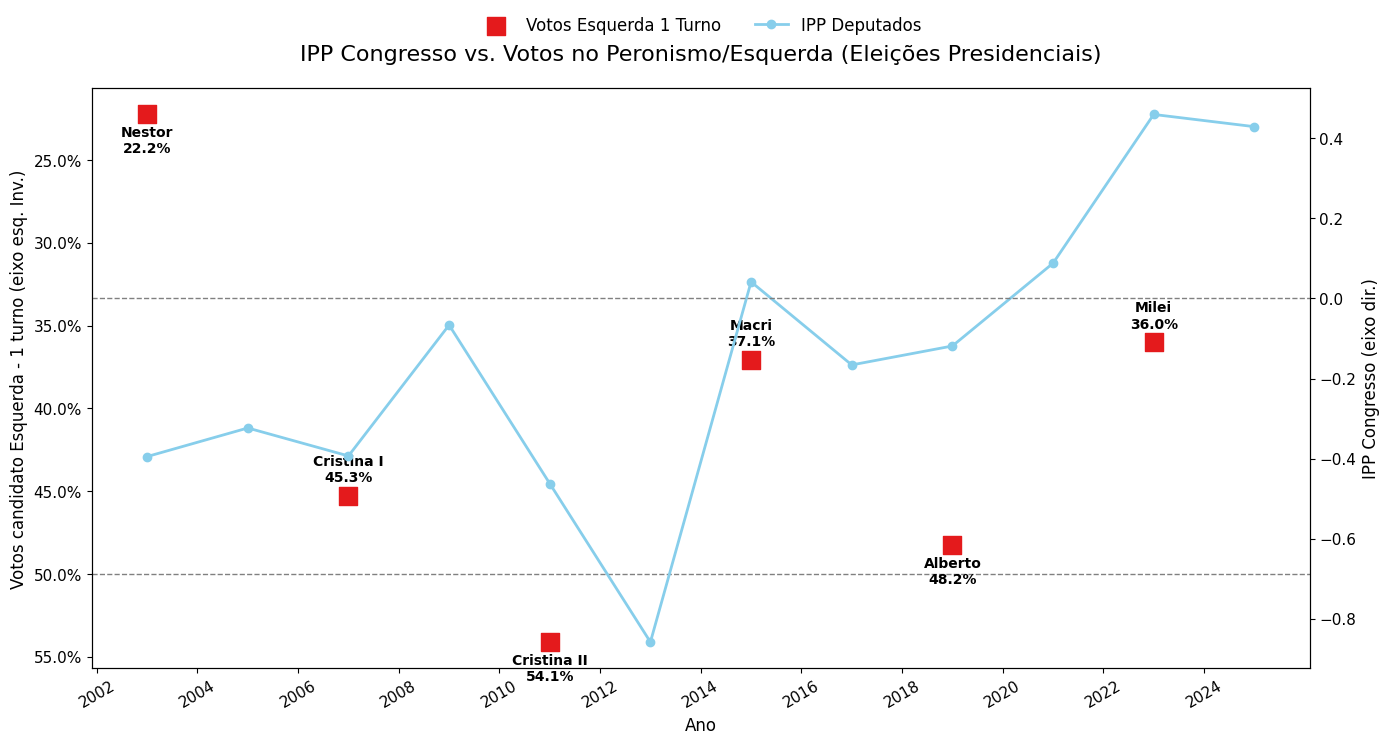

In [53]:
votos_esquerda_presidente_primeiro_turno={
"2003": ("Nestor",22.25), # nao teve segundo turno, desistencia de Menem
"2007": ("Cristina I", 45.29), # nao teve segundo turno, Cristina levou no primeiro
"2011": ("Cristina II", 54.11),  # nao teve segundo turno, Cristina levou no primeiro
"2015": ("Macri", 37.08), # 37.08 foi a votacao de Scioli no primeiro turno, ficou a frente de Macri com 34.15
"2019": ("Alberto", 48.24), # nao teve sgundo turno, Albberto levou no primeiro
"2023": ("Milei", 36) # 36 foi a votacao de Massa no primeiro turno, ficou a frente de Milei com 30
}
def grafico_segundo_turno_presidente_ipp_congresso(votos_esquerda_presidente, turno):
    anos_presidencial = [int(ano) for ano in votos_esquerda_presidente.keys()]
    votos_percentual = [v[1] for v in votos_esquerda_presidente.values()]
    # labels para formato "Nome\n xx.x%"
    votos_labels = [f"{v[0]}\n{v[1]:.1f}%" for v in votos_esquerda_presidente.values()]

    #grafico
    fig, ax1 = plt.subplots(figsize=(14, 8))

    #eixo direito - ipp congresso
    ax2 = ax1.twinx() # cria um outro eixo Y que compartilha do mesmo eixo x
    ax2.plot(anos_num, valores_deputados_definitivo, marker='o', color='skyblue', linewidth=2, label='IPP Deputados')

    ax2.set_ylabel('IPP Congresso (eixo dir.)', fontsize=12)
    ax2.tick_params(axis='y', labelsize=11)
    ax2.grid(False)
    ax2.axhline(0, color='gray', linestyle='--', linewidth=1) # linha de referencia pontilhada no zero

    # eixo esquerdo - votos presidente
    ax1.scatter(anos_presidencial, votos_percentual, marker='s', s=150, color='#e41a1c', label=f'Votos Esquerda {turno} Turno',
                 zorder=10)
    ax1.set_ylabel(f'Votos candidato Esquerda - {turno} turno (eixo esq. Inv.)',  fontsize=12)
    ax1.tick_params(axis='y', labelsize=11)

    ax1.invert_yaxis() # inverter eixo dos presidentes
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100.0))
    ax1.axhline(50, color='gray', linestyle='--', linewidth=1)

    # adicionar os rotulos para cada ponto de votocao
    for i in range(len(anos_presidencial)):
        vertical_alignment = 'bottom' if i % 2 == 0 else 'top'
        offset = 2.5 if vertical_alignment == 'bottom' else -2.5
        ax1.text(anos_presidencial[i], votos_percentual[i] + offset, votos_labels[i], ha='center', va=vertical_alignment, fontsize=10
                , fontweight='bold')

    plt.title('IPP Congresso vs. Votos no Peronismo/Esquerda (Eleições Presidenciais)', fontsize=16, pad=20)
    ax1.set_xlabel('Ano', fontsize=12)
    ax1.set_xticks(np.arange(2002, 2025, 2)) # ajustar os ticks do eixo x
    ax1.tick_params(axis='x', labelsize=11, rotation=30)

    # pega os handles e labels de cada eixo
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 =  ax2.get_legend_handles_labels()
    # combina para exibir no topo
    ax1.legend(h1 + h2, l1 + l2, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=12, frameon=False)

    plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajusta para o título não cortar
    plt.show()

grafico_segundo_turno_presidente_ipp_congresso(votos_esquerda_presidente_primeiro_turno,1)

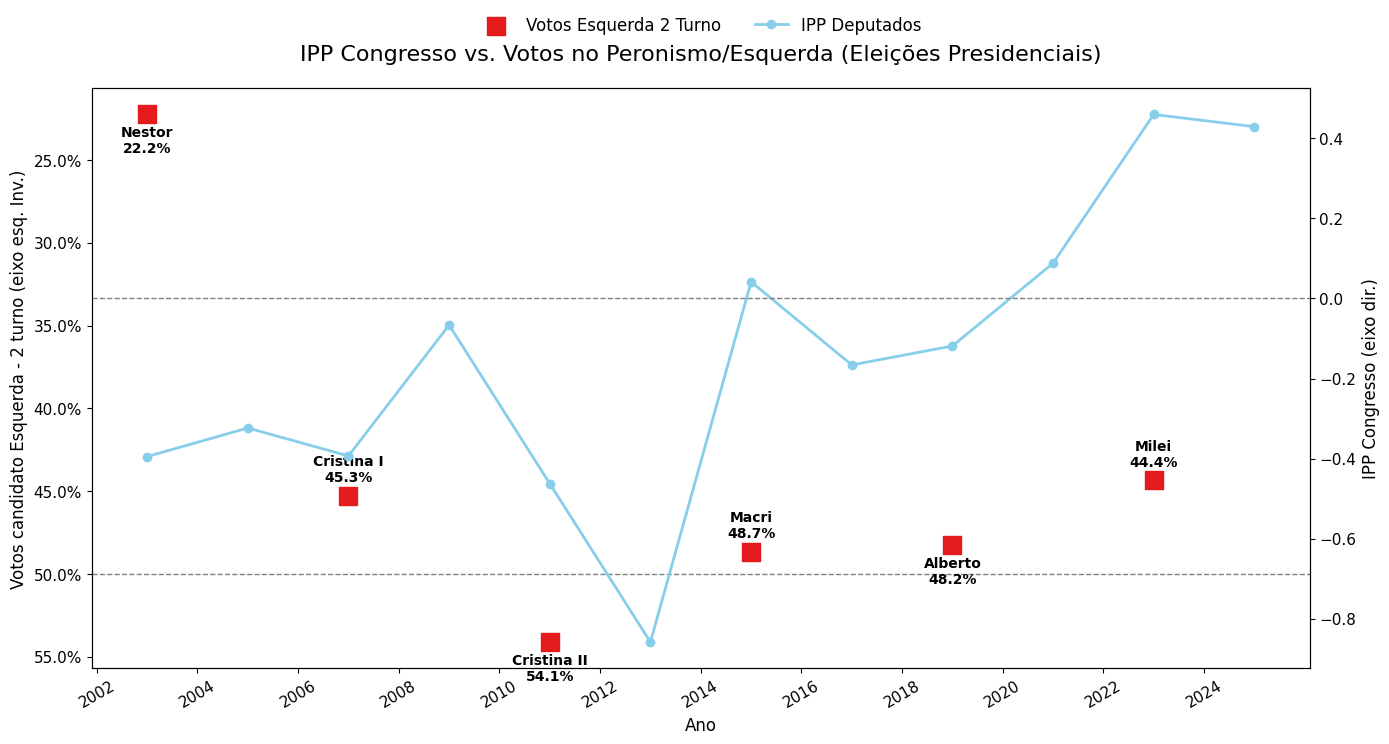

In [54]:
votos_esquerda_presidente_segundo_turno={
"2003": ("Nestor",22.25), # nao teve segundo turno, desistencia de Menem
"2007": ("Cristina I", 45.29), # nao teve segundo turno, Cristina levou no primeiro
"2011": ("Cristina II", 54.11),  # nao teve segundo turno, Cristina levou no primeiro
"2015": ("Macri", 48.66), # 48.66 foi a votacao de Scioli no segundo turno, ficou atras de Macri com 51.34
"2019": ("Alberto", 48.24), # nao teve sgundo turno, Albberto levou no primeiro
"2023": ("Milei", 44.35 ) # 44.35 foi a votacao de Massa no segundo turno, ficou atras de Milei com 55.65
}
grafico_segundo_turno_presidente_ipp_congresso(votos_esquerda_presidente_segundo_turno, 2)

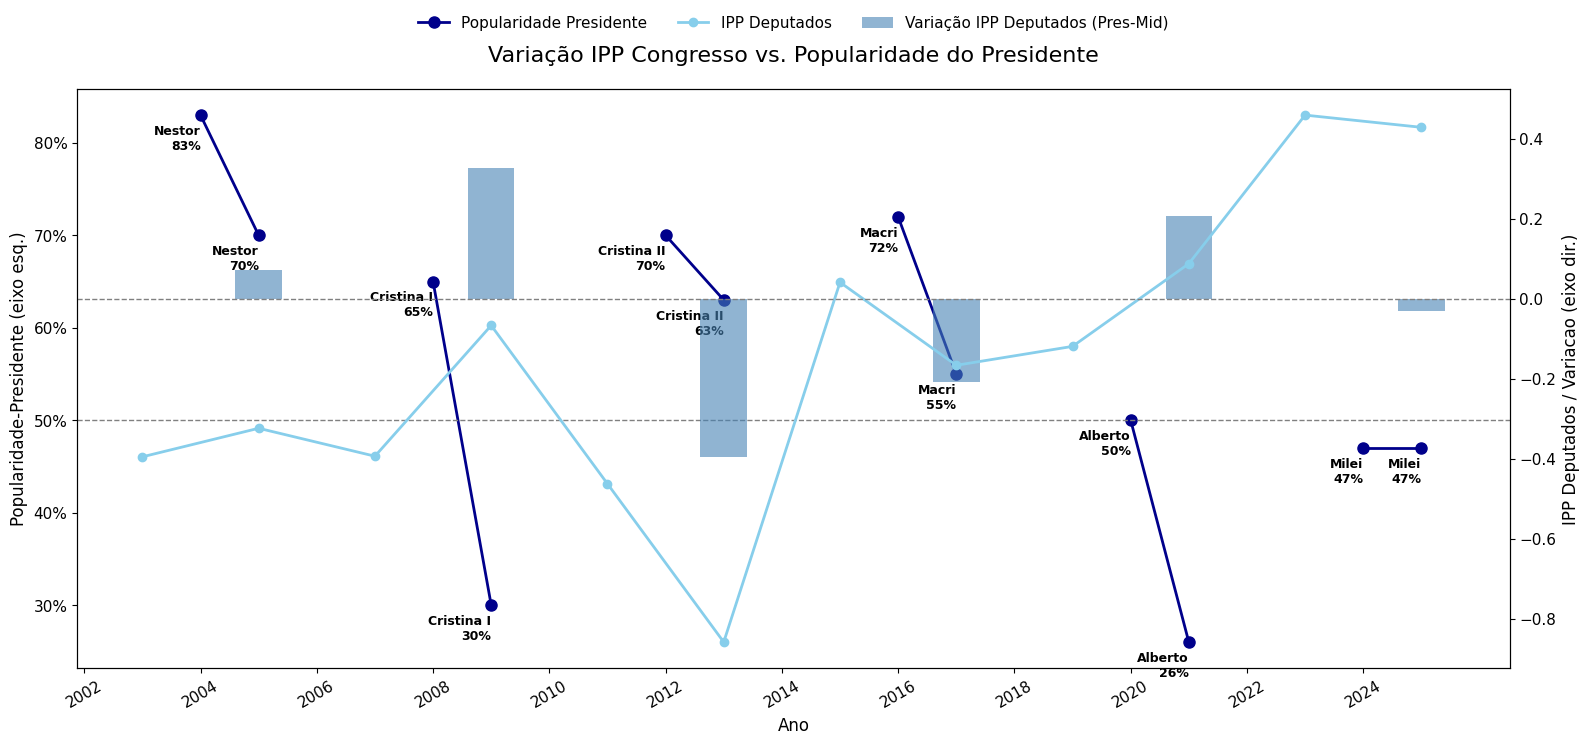

In [56]:
pop_nestor_ano1 = 83
pop_nestor_ano2 = 70
pop_cristinaI_ano1 = 65
pop_cristinaI_ano2 = 30
pop_cristinaII_ano1 = 70
pop_cristinaII_ano2 = 63
pop_macri_ano1 = 72
pop_macri_ano2 = 55 
pop_alberto_ano1 = 50
pop_alberto_ano2 = 26
pop_milei_ano1 = 47
pop_milei_ano2 = 47

popularidade_presidentes={
"2004": ("Nestor",pop_nestor_ano1),
"2005": ("Nestor",pop_nestor_ano2),
"2008": ("Cristina I", pop_cristinaI_ano1),
"2009": ("Cristina I", pop_cristinaI_ano2),  # apos problemas com a classe agricola
"2012": ("Cristina II", pop_cristinaII_ano1),
"2013": ("Cristina II", pop_cristinaII_ano2),
"2016": ("Macri", pop_macri_ano1),
"2017": ("Macri", pop_macri_ano2),
"2020": ("Alberto", pop_alberto_ano1),
"2021": ("Alberto", pop_alberto_ano2),
"2024": ("Milei", pop_milei_ano1),
"2025": ("Milei", pop_milei_ano2)
}

pop_presidentes_var = {
   "2005": ("Nestor", pop_nestor_ano2 - pop_nestor_ano1),
   "2009": ("Cristina I", pop_cristinaI_ano2 - pop_cristinaI_ano1),
   "2013": ("Cristina II", pop_cristinaII_ano2 - pop_cristinaII_ano1),
   "2017": ("Macri", pop_macri_ano2 - pop_macri_ano1),
   "2021": ("Alberto", pop_alberto_ano2 - pop_alberto_ano1),
   "2025": ("Milei", pop_milei_ano2 - pop_milei_ano1)
}

anos_pop_var = [int(ano) for ano in pop_presidentes_var.keys()]
anos_pop = [int(ano) for ano in popularidade_presidentes.keys()]
popularidade = [v[1] for v in popularidade_presidentes.values()]
pop_labels = [f"{v[0]}\n{v[1]:.1f}%" for v in popularidade_presidentes.values()]

# calcular variacao do ipp
var_ipp_deputados = []
anos_ipp_var = []
for i in range(1, len(valores_deputados_definitivo)):
   if i % 2 != 0:
      var_ipp_deputados.append(valores_deputados_definitivo[i] - valores_deputados_definitivo[i-1])

#grafico
fig, ax1 = plt.subplots(figsize=(16, 8))

#eixo direito - ipp congresso
ax2 = ax1.twinx() # cria um outro eixo Y que compartilha do mesmo eixo x
ax2.plot(anos_num, valores_deputados_definitivo, marker='o', color='skyblue', linewidth=2, label='IPP Deputados')

# barras para variacao do ipp
ax2.bar(anos_pop_var, var_ipp_deputados, color='steelblue', alpha=0.6,
        width=0.8, label='Variação IPP Deputados (Pres-Mid)')

ax2.set_ylabel('IPP Deputados / Variacao (eixo dir.)', fontsize=12)
ax2.tick_params(axis='y', labelsize=11)
ax2.grid(False)
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
# Reorganizar dados por presidente
presidentes = {}
for ano, (nome, pop) in popularidade_presidentes.items():
    if nome not in presidentes:
        presidentes[nome] = {"anos": [], "pop": []}
    presidentes[nome]["anos"].append(int(ano))
    presidentes[nome]["pop"].append(pop)

# Plotar linha de popularidade para cada presidente
# plotar popularidade: apenas a primeira terá label; as demais usam '_nolegend_'
first = True
for nome, dados in presidentes.items():
    anos_sorted, pops_sorted = zip(*sorted(zip(dados["anos"], dados["pop"])))
    if first:
        lbl = "Popularidade Presidente"
        first = False
    else:
        lbl = "_nolegend_"   # garante que NÃO entre na legenda automática
    ax1.plot(anos_sorted, pops_sorted, marker='o', linewidth=2, markersize=8,
             color='darkblue', label=lbl)
    for ano, pop in zip(anos_sorted, pops_sorted):
        ax1.text(ano, pop - 1, f"{nome}\n{pop:.0f}%", ha='right', va='top', fontsize=9, fontweight='bold')

# Eixo esquerdo - popularidade presidente
ax1.set_ylabel('Popularidade-Presidente (eixo esq.)', fontsize=12)
ax1.tick_params(axis='y', labelsize=11)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100.0))

# Título e eixos
plt.title('Variação IPP Congresso vs. Popularidade do Presidente', fontsize=16, pad=20)
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_xticks(np.arange(2002, 2025, 2))
ax1.tick_params(axis='x', labelsize=11, rotation=30)
ax1.axhline(50, color='gray', linestyle='--', linewidth = 1)

# Legendas combinadas
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper center', bbox_to_anchor=(0.5, 1.15),
           ncol=3, fontsize=11, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
df_2003_depprovincias_ba = read_csv("data\depprovincias_ba_2003.csv")
df_2005_depprovincias_ba = read_csv("data\depprovincias_ba_2005.csv")
df_2007_depprovincias_ba = read_csv("data\depprovincias_ba_2007.csv")
df_2009_depprovincias_ba = read_csv("data\depprovincias_ba_2009.csv")
df_2011_depprovincias_ba = read_csv("data\depprovincias_ba_2011.csv")
df_2013_depprovincias_ba = read_csv("data\depprovincias_ba_2013.csv")
df_2015_depprovincias_ba = read_csv("data\depprovincias_ba_2015.csv")
df_2017_depprovincias_ba = read_csv("data\depprovincias_ba_2017.csv")
df_2019_depprovincias_ba = read_csv("data\depprovincias_ba_2019.csv")
df_2021_depprovincias_ba = read_csv("data\depprovincias_ba_2021.csv")
df_2023_depprovincias_ba = read_csv("data\depprovincias_ba_2023.csv")
df_2025_depprovincias_ba = read_csv("data\depprovincias_ba_2025.csv")

df_2003_depprovincias_ba['agrupacion_nombre'] = df_2003_depprovincias_ba['agrupacion_nombre'].apply(normalize_name, 
                                                                                                normalizacoes=normalizacoes_2003)
df_2005_depprovincias_ba['agrupacion_nombre'] = df_2005_depprovincias_ba['agrupacion_nombre'].apply(normalize_name, 
                                                                                                normalizacoes=normalizacoes_2005)
df_2007_depprovincias_ba['agrupacion_nombre'] = df_2007_depprovincias_ba['agrupacion_nombre'].apply(normalize_name, 
                                                                                                normalizacoes=normalizacoes_2007)
df_2009_depprovincias_ba['agrupacion_nombre'] = df_2009_depprovincias_ba['agrupacion_nombre'].apply(normalize_name, 
                                                                                                normalizacoes=normalizacoes_2009)
df_2011_depprovincias_ba['agrupacion_nombre'] = df_2011_depprovincias_ba['agrupacion_nombre'].apply(normalize_name, 
                                                                                                normalizacoes=normalizacoes_2011 )
df_2013_depprovincias_ba['agrupacion_nombre'] = df_2013_depprovincias_ba['agrupacion_nombre'].apply(normalize_name,
                                                                                                normalizacoes=normalizacoes_2013)
df_2015_depprovincias_ba['agrupacion_nombre'] = df_2015_depprovincias_ba['agrupacion_nombre'].apply(normalize_name,
                                                                                                normalizacoes=normalizacoes_2015)
df_2017_depprovincias_ba['agrupacion_nombre'] = df_2017_depprovincias_ba['agrupacion_nombre'].apply(normalize_name,
                                                                                                normalizacoes=normalizacoes_2017)
df_2019_depprovincias_ba['agrupacion_nombre'] = df_2019_depprovincias_ba['agrupacion_nombre'].apply(normalize_name,
                                                                                                normalizacoes=normalizacoes_2019)
df_2021_depprovincias_ba['agrupacion_nombre'] = df_2021_depprovincias_ba['agrupacion_nombre'].apply(normalize_name,
                                                                                                normalizacoes=normalizacoes_2021)
df_2023_depprovincias_ba['agrupacion_nombre'] = df_2023_depprovincias_ba['agrupacion_nombre'].apply(normalize_name,
                                                                                                normalizacoes=normalizacoes_2023)
df_2025_depprovincias_ba['agrupacion_nombre'] = df_2025_depprovincias_ba['agrupacion_nombre'].apply(normalize_name)

In [ ]:
df_ipp_provin_ba = read_csv("data\ipp_provin_ba.csv")

IPP total da eleição para Deputados Nacionais 2025: 0.06554770651930825
IPP total da eleição para Deputados Nacionais 2023: 0.30184129310736557
IPP total da eleição para Deputados Nacionais 2021: -0.0375558925334215
IPP total da eleição para Deputados Nacionais 2019: -0.13750934558285227
IPP total da eleição para Deputados Nacionais 2017: -0.2583811882132804
IPP total da eleição para Deputados Nacionais 2015: 0.13673649596775794
IPP total da eleição para Deputados Nacionais 2013: -0.9253251193050525
IPP total da eleição para Deputados Nacionais 2011: -0.4312266138601855
IPP total da eleição para Deputados Nacionais 2009: -0.12524548331062413
IPP total da eleição para Deputados Nacionais 2007: -0.4627718983636171
IPP total da eleição para Deputados Nacionais 2005: -0.7470448415838562
IPP total da eleição para Deputados Nacionais 2003: -0.5530405685063252


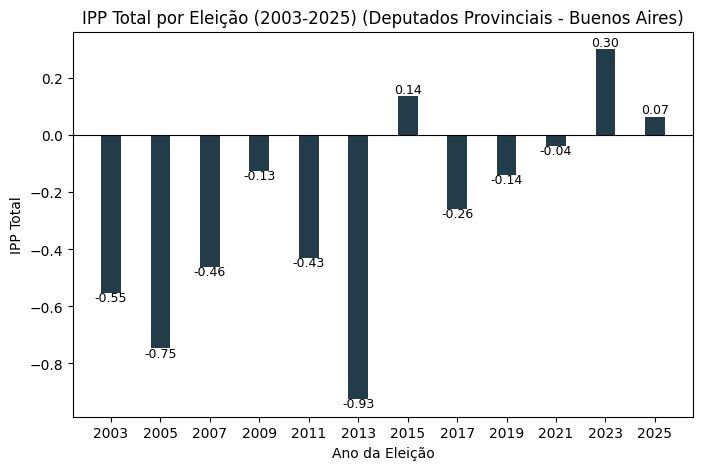

In [ ]:
anos_provin=[2003,2005,2007,2009,2011,2013,2015,2017,2019,2021,2023,2025]
anos_dfs_deputados_provinciais_ba = {
    2025: (df_2025_depprovincias_ba, "DIPUTADO PROVINCIAL"),
    2023: (df_2023_depprovincias_ba, "DIPUTADO PROVINCIAL"),
    2021: (df_2021_depprovincias_ba, "DIPUTADO PROVINCIAL"),
    2019: (df_2019_depprovincias_ba, "DIPUTADO PROVINCIAL"),
    2017: (df_2017_depprovincias_ba, "DIPUTADO PROVINCIAL"),
    2015: (df_2015_depprovincias_ba, "DIPUTADO PROVINCIAL"),
    2013: (df_2013_depprovincias_ba, "DIPUTADO PROVINCIAL"),
    2011: (df_2011_depprovincias_ba, "DIPUTADO PROVINCIAL"),
    2009: (df_2009_depprovincias_ba, "DIPUTADO PROVINCIAL"),
    2007: (df_2007_depprovincias_ba, "DIPUTADO PROVINCIAL"),
    2005: (df_2005_depprovincias_ba, "DIPUTADO PROVINCIAL"),
    2003: (df_2003_depprovincias_ba, "DIPUTADO PROVINCIAL")
}

ipps_depprovinciais_ba, _, resultados = exibir_ipp(anos_dfs_deputados_provinciais_ba, {}, df_ipp=df_ipp_provin_ba)
valores_depprovinciais_ba  = list(ipps_depprovinciais_ba.get(ano, 0) for ano in anos_provin)
exibir_grafico_ipp(valores_depprovinciais_ba, ipps_depprovinciais_ba, "Deputados Provinciais - Buenos Aires", anos_provin)

Inclinação (m): 0.8687
Interceptação (c): 0.0565
Coeficiente de Correlação (r): 0.9334
R² (Coeficiente de Determinação): 0.8713
P-valor: 0.0000


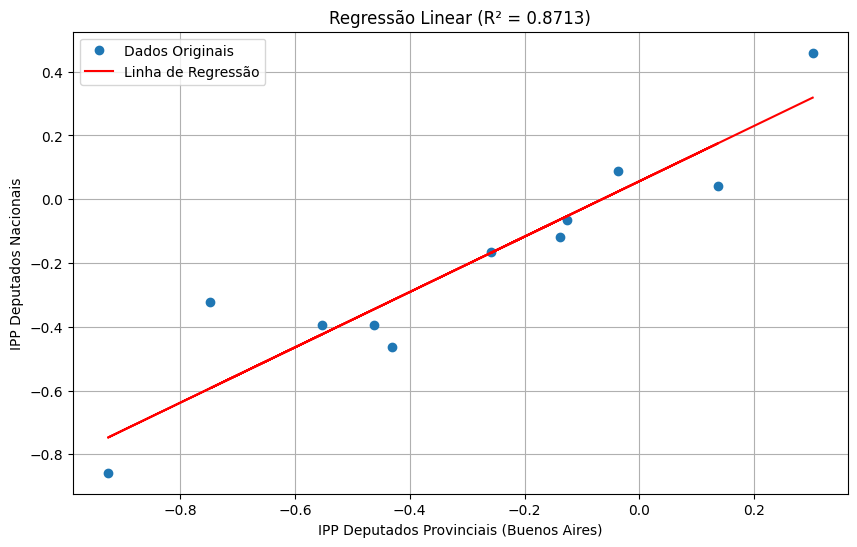

In [ ]:
#regressao do ipp da provincia de buenos aires em ipp de deputados nacionais
x = np.array(valores_depprovinciais_ba[:-1])
y = np.array(valores_deputados_definitivo)

#regressao
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

#R2
r2 = r_value**2

print(f"Inclinação (m): {slope:.4f}")
print(f"Interceptação (c): {intercept:.4f}")
print(f"Coeficiente de Correlação (r): {r_value:.4f}")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")
print(f"P-valor: {p_value:.4f}")

#grafico
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Dados Originais')
plt.plot(x, slope * x + intercept, 'r', label='Linha de Regressão')
plt.title(f'Regressão Linear (R² = {r2:.4f})')
plt.xlabel('IPP Deputados Provinciais (Buenos Aires)')
plt.ylabel('IPP Deputados Nacionais')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#previsao do ipp para deputados nacionais
ipp_depnacionais_2025 = (valores_depprovinciais_ba[-1]*slope + intercept)
print(ipp_depnacionais_2025)

0.11339269033501345


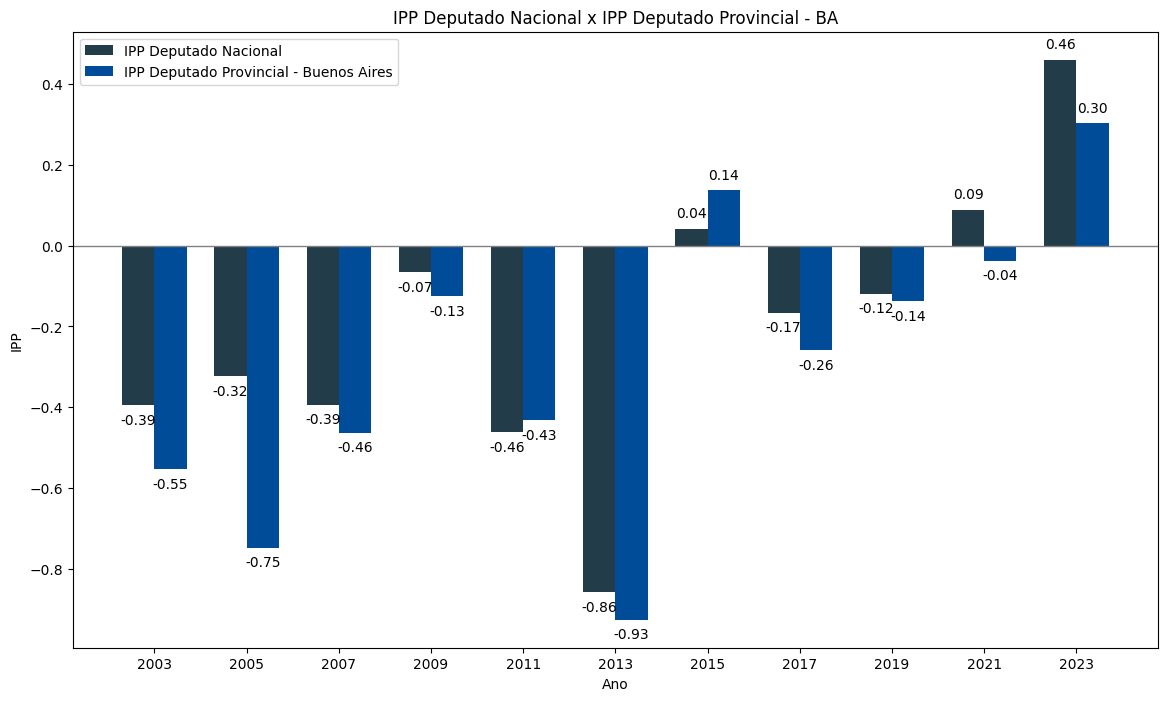

In [ ]:
plt.figure(figsize=(14,8))
bars1 = plt.bar(np.arange(len(anos)) - 0.35/2, valores_deputados_definitivo,width=0.35, label='IPP Deputado Nacional',  color='#233C49')
bars2 = plt.bar(np.arange(len(anos)) + 0.35/2,valores_depprovinciais_ba[:-1], width=0.35,  label='IPP Deputado Provincial - Buenos Aires',color="#004c99")

plt.xticks(np.arange(len(anos)), anos)
plt.axhline(0, color='gray', linewidth=1)

plt.title('IPP Deputado Nacional x IPP Deputado Provincial - BA')
plt.xlabel('Ano')
plt.ylabel('IPP')
plt.legend()
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval + (0.02 if yval >= 0 else -0.02),   # deslocamento pra cima/baixo
             f'{yval:.2f}', ha='center', va='bottom' if yval>=0 else 'top', color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval + (0.02 if yval >= 0 else -0.02), 
             f'{yval:.2f}', ha='center', va='bottom' if yval>=0 else 'top', color='black')
plt.show()